# Implementation of Age Detection





Track experiment on dagshub: blushing-wren-916

In [62]:
# #install mlflow
# !pip install mlflow --quiet
# %pip install mtcnn

In [63]:
#setup creditials for mlflow
import mlflow
import os
from getpass import getpass

os.environ['MLFLOW_TRACKING_USERNAME'] = input('Enter your DAGsHub username: ')
os.environ['MLFLOW_TRACKING_PASSWORD'] = getpass('Enter your DAGsHub access token: ')
os.environ['MLFLOW_TRACKING_PROJECTNAME'] = input('Enter your DAGsHub project name: ')

mlflow.set_tracking_uri(f'https://dagshub.com/' + os.environ['MLFLOW_TRACKING_USERNAME']
                        + '/' + os.environ['MLFLOW_TRACKING_PROJECTNAME'] + '.mlflow')

In [ ]:
#auto track in mlflow
mlflow.tensorflow.autolog()

In [ ]:
#check GPU utilization
!nvidia-smi

Thu Feb 29 07:34:37 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   50C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
# #connecting with drive
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


Importing require packages/libraries also need to install it using requirements.txt file

In [48]:
#import required libraries 
import cv2
import sys
import keras
import pandas as pd
import sklearn as sk
import scipy as sp
import tensorflow as tf
import platform
import scipy.io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras import applications,activations
from keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array
from keras import optimizers,utils
from keras.models import Sequential, Model
from keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D,BatchNormalization,ZeroPadding2D
from keras.layers import Convolution2D, Activation,MaxPooling2D
from keras import backend as k
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping
from sklearn.model_selection import train_test_split
from keras import layers, models, callbacks
from sklearn.metrics import confusion_matrix
from keras.preprocessing import image
from keras.regularizers import l2
from keras.models import load_model
from mtcnn import MTCNN
import matplotlib.pyplot as plt

In [ ]:
# !wget https://data.vision.ee.ethz.ch/cvl/rrothe/imdb-wiki/static/wiki.tar.gz /content/

--2024-03-01 04:23:51--  https://data.vision.ee.ethz.ch/cvl/rrothe/imdb-wiki/static/wiki.tar.gz
Resolving data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)... 129.132.52.178, 2001:67c:10ec:36c2::178
Connecting to data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)|129.132.52.178|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3157487479 (2.9G) [application/x-gzip]
Saving to: ‘wiki.tar.gz’

wiki.tar.gz         100%[===================>]   2.94G  13.3MB/s    in 3m 41s  

2024-03-01 04:27:33 (13.6 MB/s) - ‘wiki.tar.gz’ saved [3157487479/3157487479]

/content/: Scheme missing.
FINISHED --2024-03-01 04:27:33--
Total wall clock time: 3m 42s
Downloaded: 1 files, 2.9G in 3m 41s (13.6 MB/s)


In [ ]:
# !tar -xzvf "/content/wiki.tar.gz" -C "/content/"

Streaming output truncated to the last 5000 lines.
wiki/50/8653450_1985-11-28_2014.jpg
wiki/50/28040650_1986-04-20_2011.jpg
wiki/50/1896450_1928-03-22_1990.jpg
wiki/50/39477450_1965-01-04_2014.jpg
wiki/50/17106250_1950-02-23_2010.jpg
wiki/50/17508150_1986-04-22_2012.jpg
wiki/50/15701850_1986-04-15_2010.jpg
wiki/50/28037450_1934-07-09_2002.jpg
wiki/50/14040750_1989-10-04_2008.jpg
wiki/50/28991050_1964-08-19_2010.jpg
wiki/50/27962750_1894-03-20_1946.jpg
wiki/50/29127850_1923-11-05_2007.jpg
wiki/50/33309450_1989-04-27_2012.jpg
wiki/50/20291650_1987-02-18_2014.jpg
wiki/50/2529850_1922-12-05_1966.jpg
wiki/50/42305150_1954-07-11_1950.jpg
wiki/50/22659150_1890-11-01_1962.jpg
wiki/50/29569950_1978-04-28_1999.jpg
wiki/50/7720450_1956-07-18_2010.jpg
wiki/50/7973150_1985-10-07_2009.jpg
wiki/50/2744250_1981-01-17_2010.jpg
wiki/50/166450_1927-06-15_1989.jpg
wiki/50/35796450_1936-01-21_1973.jpg
wiki/50/43761250_1941-04-20_1960.jpg
wiki/50/38389550_1970-03-25_1996.jpg
wiki/50/683150_1986-06-27_2007.j

## Data Collection and Transforamtion from mat file to dataframe

In [49]:
# Reading Matlab files with SciPy
mat = scipy.io.loadmat('/Users/rachana/Rachana_Python_VS/age_detection_version2/Data/wiki.mat')

In [50]:
# Matlab file
mat

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sat Jan 16 16:25:20 2016',
 '__version__': '1.0',
 '__globals__': [],
 'wiki': array([[(array([[723671, 703186, 711677, ..., 720620, 723893, 713846]], dtype=int32), array([[2009, 1964, 2008, ..., 2013, 2011, 2008]], dtype=uint16), array([[array(['17/10000217_1981-05-05_2009.jpg'], dtype='<U31'),
                 array(['48/10000548_1925-04-04_1964.jpg'], dtype='<U31'),
                 array(['12/100012_1948-07-03_2008.jpg'], dtype='<U29'), ...,
                 array(['09/9998109_1972-12-27_2013.jpg'], dtype='<U30'),
                 array(['00/9999400_1981-12-13_2011.jpg'], dtype='<U30'),
                 array(['80/999980_1954-06-11_2008.jpg'], dtype='<U29')]],
               dtype=object), array([[1., 1., 1., ..., 1., 1., 0.]]), array([[array(['Sami Jauhojärvi'], dtype='<U15'),
                 array(['Dettmar Cramer'], dtype='<U14'),
                 array(['Marc Okrand'], dtype='<U11'), ...,
                 arr

In [51]:
# Converting into pandas dataframe. Always easier and better to deal with

instances = mat['wiki'][0][0][0].shape[1]

columns = ["dob", "photo_taken", "full_path", "gender", "name", "face_location", "face_score", "second_face_score"]

df = pd.DataFrame(index = range(0,instances), columns = columns)

for i in mat:
    if i == "wiki":
        current_array = mat[i][0][0]

for j in range(len(current_array)):
    df[columns[j]] = pd.DataFrame(current_array[j][0])

In [52]:
 # Lets see how exactly our dataset looks
df.head()

,dob,photo_taken,full_path,gender,name,face_location,face_score,second_face_score
0,723671,2009,[17/10000217_1981-05-05_2009.jpg],1.0,[Sami Jauhojärvi],"[[111.29109473290997, 111.29109473290997, 252....",4.300962,NaN
1,703186,1964,[48/10000548_1925-04-04_1964.jpg],1.0,[Dettmar Cramer],"[[252.48330229530742, 126.68165114765371, 354....",2.645639,1.949248
2,711677,2008,[12/100012_1948-07-03_2008.jpg],1.0,[Marc Okrand],"[[113.52, 169.83999999999997, 366.08, 422.4]]",4.329329,NaN
3,705061,1961,[65/10001965_1930-05-23_1961.jpg],1.0,[Aleksandar Matanović],"[[1, 1, 634, 440]]",-inf,NaN
4,720044,2012,[16/10002116_1971-05-31_2012.jpg],0.0,[Diana Damrau],"[[171.61031405173117, 75.57451239763239, 266.7...",3.408442,NaN


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62328 entries, 0 to 62327
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   dob                62328 non-null  int32  
 1   photo_taken        62328 non-null  uint16 
 2   full_path          62328 non-null  object 
 3   gender             59685 non-null  float64
 4   name               62328 non-null  object 
 5   face_location      62328 non-null  object 
 6   face_score         62328 non-null  float64
 7   second_face_score  4096 non-null   float64
dtypes: float64(3), int32(1), object(3), uint16(1)
memory usage: 3.2+ MB


## Data Cleaning and Preprocessing

In [53]:
#Extracting  Year from DOB
from datetime import datetime, timedelta
def datenum_to_datetime(datenum):
    days = datenum % 1
    hours = days % 1 * 24
    minutes = hours % 1 * 60
    seconds = minutes % 1 * 60
    exact_date = datetime.fromordinal(int(datenum)) + timedelta(days=int(days)) + timedelta(hours=int(hours)) \
    + timedelta(minutes=int(minutes)) + timedelta(seconds=round(seconds)) - timedelta(days=366)

    return exact_date.year

df['date_of_birth'] = df['dob'].apply(datenum_to_datetime)

In [54]:
# Getting present age from dob and photo taken col
df['age'] = df['photo_taken'] - df['date_of_birth']

In [55]:
df.head()

,dob,photo_taken,full_path,gender,name,face_location,face_score,second_face_score,date_of_birth,age
0,723671,2009,[17/10000217_1981-05-05_2009.jpg],1.0,[Sami Jauhojärvi],"[[111.29109473290997, 111.29109473290997, 252....",4.300962,NaN,1981,28
1,703186,1964,[48/10000548_1925-04-04_1964.jpg],1.0,[Dettmar Cramer],"[[252.48330229530742, 126.68165114765371, 354....",2.645639,1.949248,1925,39
2,711677,2008,[12/100012_1948-07-03_2008.jpg],1.0,[Marc Okrand],"[[113.52, 169.83999999999997, 366.08, 422.4]]",4.329329,NaN,1948,60
3,705061,1961,[65/10001965_1930-05-23_1961.jpg],1.0,[Aleksandar Matanović],"[[1, 1, 634, 440]]",-inf,NaN,1930,31
4,720044,2012,[16/10002116_1971-05-31_2012.jpg],0.0,[Diana Damrau],"[[171.61031405173117, 75.57451239763239, 266.7...",3.408442,NaN,1971,41


In [56]:
#remove pictures does not include face
df = df[df['face_score'] != -np.inf]

#some pictures include more than one face, remove them
df = df[df['second_face_score'].isna()]

#remove age greater than 65
df = df[df['age'] <= 65]

#remove age less than 20
df = df[df['age'] >= 20]

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34885 entries, 0 to 62327
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   dob                34885 non-null  int32  
 1   photo_taken        34885 non-null  uint16 
 2   full_path          34885 non-null  object 
 3   gender             34198 non-null  float64
 4   name               34885 non-null  object 
 5   face_location      34885 non-null  object 
 6   face_score         34885 non-null  float64
 7   second_face_score  0 non-null      float64
 8   date_of_birth      34885 non-null  int64  
 9   age                34885 non-null  int64  
dtypes: float64(3), int32(1), int64(2), object(3), uint16(1)
memory usage: 2.6+ MB


In [58]:
# Lower threshold for face_score - allows more images of poor quality (making the model more robust)

df = df[df['face_score'] >= 1.75]
df = df.drop(columns = ['name','face_score','second_face_score','date_of_birth','face_location'])

In [59]:
df.info()     

<class 'pandas.core.frame.DataFrame'>
Index: 29752 entries, 0 to 62327
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   dob          29752 non-null  int32  
 1   photo_taken  29752 non-null  uint16 
 2   full_path    29752 non-null  object 
 3   gender       29164 non-null  float64
 4   age          29752 non-null  int64  
dtypes: float64(1), int32(1), int64(1), object(1), uint16(1)
memory usage: 1.1+ MB


In [60]:
# GENDER: 0 - female , 1-male , NaN - unknown
df.head()

,dob,photo_taken,full_path,gender,age
0,723671,2009,[17/10000217_1981-05-05_2009.jpg],1.0,28
2,711677,2008,[12/100012_1948-07-03_2008.jpg],1.0,60
4,720044,2012,[16/10002116_1971-05-31_2012.jpg],0.0,41
5,716189,2012,[02/10002702_1960-11-09_2012.jpg],0.0,52
6,707745,1971,[41/10003541_1937-09-27_1971.jpg],1.0,34


In [61]:
df.describe()

,dob,photo_taken,gender,age
count,29752.000000,29752.000000,29164.000000,29752.000000
mean,717926.678509,2001.257495,0.742594,36.140293
std,8551.286016,19.976254,0.437213,12.232321
min,685555.000000,1940.000000,0.000000,20.000000
25%,713283.750000,2006.000000,0.000000,26.000000
50%,720385.500000,2010.000000,1.000000,33.000000
75%,724720.000000,2013.000000,1.000000,45.000000
max,729016.000000,2015.000000,1.000000,65.000000


In [62]:
df['path'] = [str('/Users/rachana/Rachana_Python_VS/age_detection_version2/Data/wiki/')+str(np.squeeze(i)) for i in df['full_path']]
df

,dob,photo_taken,full_path,gender,age,path
0,723671,2009,[17/10000217_1981-05-05_2009.jpg],1.0,28,/Users/rachana/Rachana_Python_VS/age_detection...
2,711677,2008,[12/100012_1948-07-03_2008.jpg],1.0,60,/Users/rachana/Rachana_Python_VS/age_detection...
4,720044,2012,[16/10002116_1971-05-31_2012.jpg],0.0,41,/Users/rachana/Rachana_Python_VS/age_detection...
5,716189,2012,[02/10002702_1960-11-09_2012.jpg],0.0,52,/Users/rachana/Rachana_Python_VS/age_detection...
6,707745,1971,[41/10003541_1937-09-27_1971.jpg],1.0,34,/Users/rachana/Rachana_Python_VS/age_detection...
...,...,...,...,...,...,...
62321,707521,1968,[38/9996938_1937-02-15_1968.jpg],1.0,31,/Users/rachana/Rachana_Python_VS/age_detection...
62322,709971,1968,[46/9996946_1943-11-01_1968.jpg],1.0,25,/Users/rachana/Rachana_Python_VS/age_detection...
62323,707582,1963,[49/9996949_1937-04-17_1963.jpg],1.0,26,/Users/rachana/Rachana_Python_VS/age_detection...
62325,720620,2013,[09/9998109_1972-12-27_2013.jpg],1.0,41,/Users/rachana/Rachana_Python_VS/age_detection...


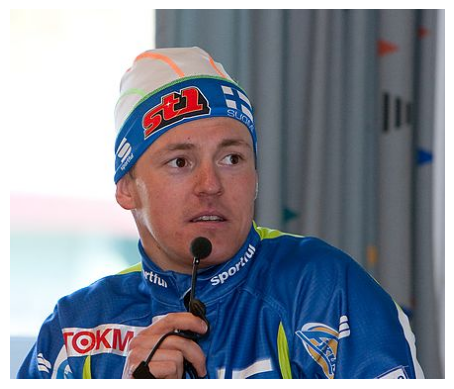

In [63]:
#Model has been train based on images based on provided wikipedia data which covers uppar body of person 
import cv2
from matplotlib import pyplot as plt

# Assuming you want to display the image of the first face in the DataFrame
image_path = df['path'][0]

# Load the image using cv2
image = cv2.imread(image_path)

# Display the image
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')  # Turn off axis numbers
plt.show()


## EDA (Exploratory Data Analysis)

After looking at all data and their datatypes and cleaning the data, to get relevant columns,  lets analyze the data and its distribution, for better understanding of dataset.

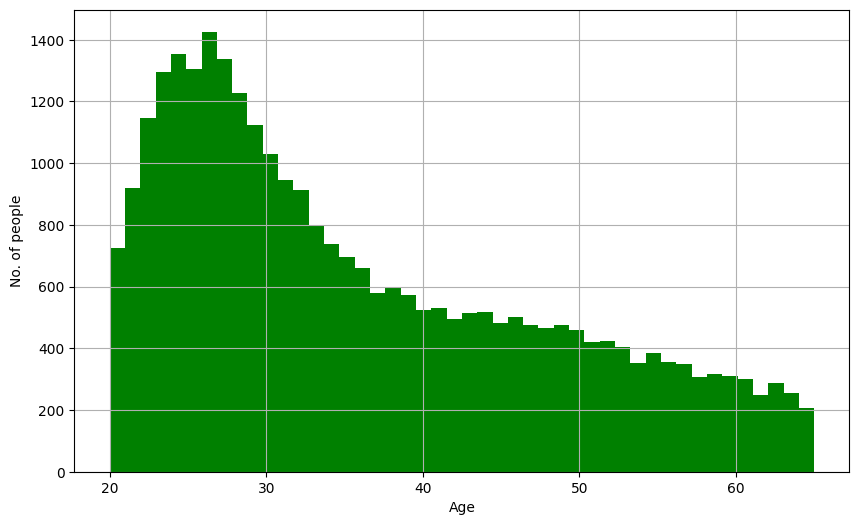

In [23]:
#Distibution of number of people based on ages
df['age'].hist(bins=df['age'].nunique(),color='g',figsize=(10,6))

plt.xlabel('Age')
plt.ylabel('No. of people')
plt.show()

we can see that a large chunk of population in training data is from 20 to 60. Sort of bell-shaped curve Gaussian Distribution -very non uniform.

Mean age is 38.492

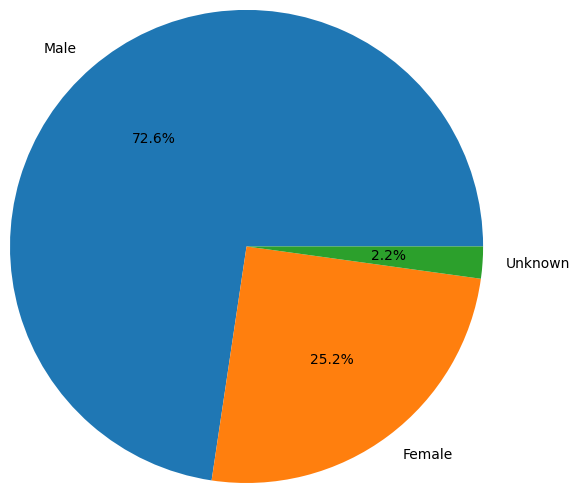

In [24]:
#Gender wise distribution
x1 = df[df['gender']==1]['gender'].count()
x2 = df[df['gender']==0]['gender'].count()
inp = [x1,x2,650]
lab = ['Male', 'Female', 'Unknown']

plt.pie(inp, labels=lab,radius=1.6,autopct='%.1f%%')
plt.show()

# Clearly, the dataset is heavily imbalanced in favour of males

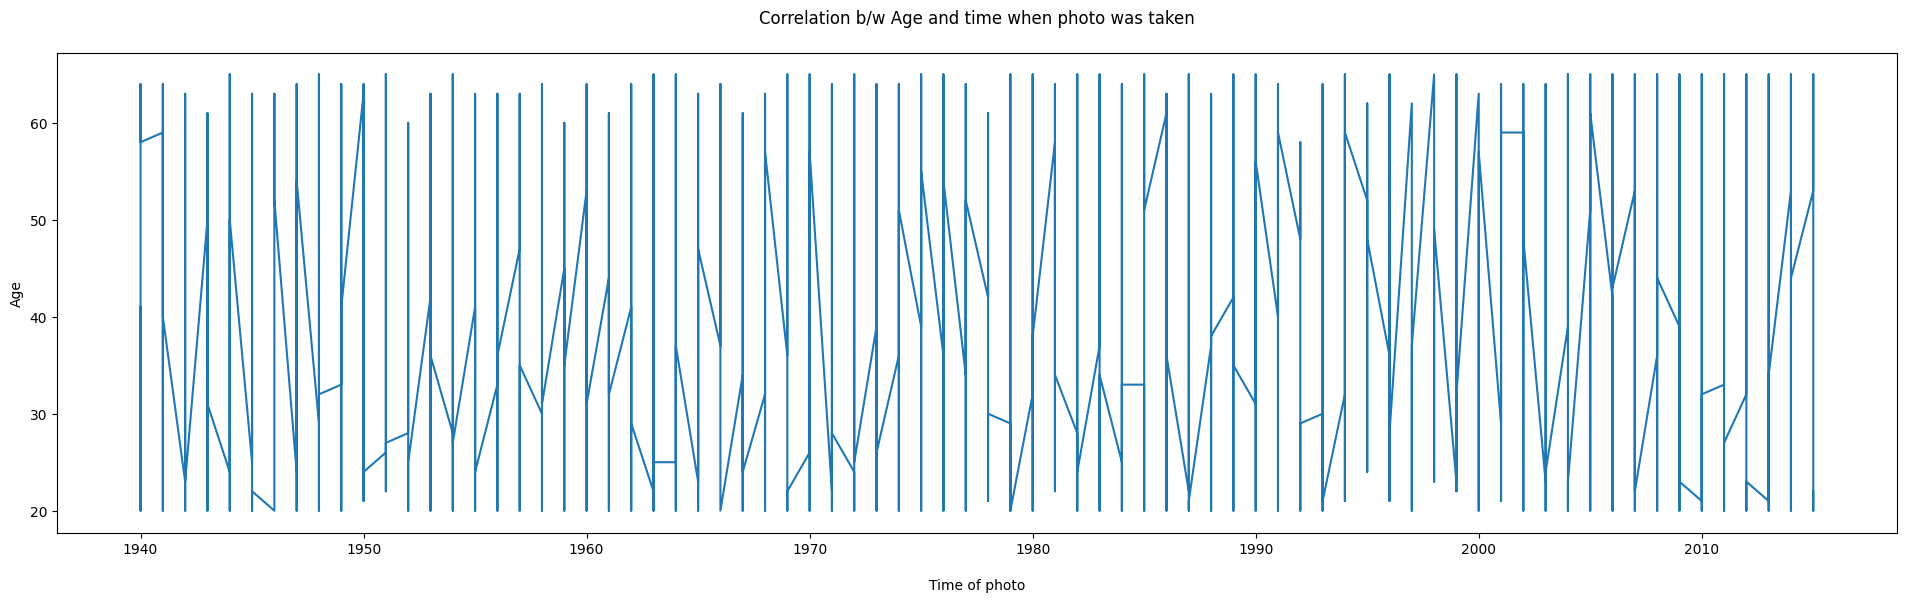

In [25]:
# Analysis for Correlation b/w Age and time when photo was taken
x = df.sort_values(by='photo_taken')
fig= plt.figure(figsize=(23,6))                        # width and height of plot in unit inches
axes= fig.add_axes([0.1,0.1,0.8,0.8])
axes.plot(x['photo_taken'],x['age'])
plt.title('Correlation b/w Age and time when photo was taken\n')
plt.xlabel('\nTime of photo')
plt.ylabel('Age')
plt.show()

# Shows that irrespective of when photo was taken, almost always ppl between 20-70 have been covered.


### Pixel based EDA on images

In [26]:
# For further EDA on images itself, we need to extract their pixel values. These pixel values won't have any use other than in EDA

target_size = (198, 198)

def get_image_pixel(image_path):
    pic = load_img("/Users/rachana/Rachana_Python_VS/age_detection_version2/Data/wiki/%s" % image_path[0], target_size=target_size)
    x = img_to_array(pic).reshape(1, -1)[0]
    return x

#df['pixels'] = df['full_path'].apply(get_image_pixel)

* Keras provides the `load_img()` function for loading an image from file as a
PIL image object.

The `load_img()` function provides additional arguments that may be useful when loading the image, such as **grayscale** that allows the image to be loaded in grayscale (defaults to False), **color_mode** that allows the image mode or channel format to be specified (defaults to rgb), and **target_size** that allows a tuple of (height, width) to be specified, resizing the image automatically after being loaded.


* Keras provides the `img_to_array()` function for converting a loaded image in PIL format into a NumPy array for use with deep learning models.

The numpy array essentially is the  pixel data.

In [27]:
df.head()

,dob,photo_taken,full_path,gender,age,path
0,723671,2009,[17/10000217_1981-05-05_2009.jpg],1.0,28,/Users/rachana/Rachana_Python_VS/age_detection...
2,711677,2008,[12/100012_1948-07-03_2008.jpg],1.0,60,/Users/rachana/Rachana_Python_VS/age_detection...
4,720044,2012,[16/10002116_1971-05-31_2012.jpg],0.0,41,/Users/rachana/Rachana_Python_VS/age_detection...
5,716189,2012,[02/10002702_1960-11-09_2012.jpg],0.0,52,/Users/rachana/Rachana_Python_VS/age_detection...
6,707745,1971,[41/10003541_1937-09-27_1971.jpg],1.0,34,/Users/rachana/Rachana_Python_VS/age_detection...


In [29]:
# # Each image now is 198 x 198 x 1. Hence has 39204 pixels (NumPy array)
# df['pixels'][0].shape
# x = df['age']
# x = x.sort_values()
# x.unique()


In [ ]:
# # Here, we get the average pixel value for every image

# x = df.sort_values(by='age')
# x.reset_index(inplace=True)

# x['pixel_per_image'] = x['pixels']
# x['pixel_deviation_per_image'] = x['pixels']

# for i in range(34200):
#   x['pixel_per_image'][i] = x['pixels'][i].mean()
#   x['pixel_deviation_per_image'][i] = x['pixels'][i].max()-x['pixels'][i].min()

# x.head()

In [ ]:
# print(x['pixel_per_image'].min())

# print(x['pixel_per_image'].max())

# print(x['pixel_per_image'].mean())     # Average pixel value across all images

In [ ]:
# sns.stripplot(x='gender', y='pixel_per_image', data=x, alpha=0.3, jitter=True);

# # There seems no correlation b/w gender and mean_pixel value as such. To confirm, let's just check the mean pixel value for male and     female and try to plot their distribution to see amt of overlap

In [ ]:
# print(x[x['gender']==1]['index'].count())      # male count
# print(x[x['gender']==0]['index'].count())      # female count

In [ ]:
# sum1=0
# sum2=0
# for i in range(34200):
#     if x['gender'][i]==1:
#         sum1+=x['pixel_per_image'][i]

#     elif x['gender'][i]==0:
#         sum2+=x['pixel_per_image'][i]

# val1 = sum1/24842                 # Avg pixel value for male
# val2 = sum2/8708                  # Avg pixel value for female

# print(val1,' ',val2)              # Mean pixel val for male and female

In [ ]:
# sns.lmplot(x='age', y='pixel_per_image', hue='gender', data=x, fit_reg=False, scatter_kws={'alpha':0.5})
# plt.title('Avg pixel value in an image vs Age\n')
# plt.show()

deviation in pixel values (max-min) in an image

In [ ]:
# print(x['pixel_deviation_per_image'].min())

# print(x['pixel_deviation_per_image'].max())

# print(x['pixel_deviation_per_image'].mean())             # Average pixel deviation across all images

In [30]:
# Defining a function to return the class labels corresponding to the re-distributed 9 age-ranges.

def class_labels_reassign(age):

    if 20 <= age <25:
        return 0
    elif 25 <= age < 30:
        return 1
    elif 30 <= age < 35:
        return 2
    elif 35 <= age < 40:
        return 3
    elif 40 <= age < 45:
        return 4
    elif 45 <= age < 50:
        return 5
    elif 50 <= age < 55:
        return 6
    elif 55 <= age < 60:
        return 7
    else:
        return 8

In [31]:
df['ageclass'] = df['age'].map(class_labels_reassign)

In [32]:
df

,dob,photo_taken,full_path,gender,age,path,ageclass
0,723671,2009,[17/10000217_1981-05-05_2009.jpg],1.0,28,/Users/rachana/Rachana_Python_VS/age_detection...,1
2,711677,2008,[12/100012_1948-07-03_2008.jpg],1.0,60,/Users/rachana/Rachana_Python_VS/age_detection...,8
4,720044,2012,[16/10002116_1971-05-31_2012.jpg],0.0,41,/Users/rachana/Rachana_Python_VS/age_detection...,4
5,716189,2012,[02/10002702_1960-11-09_2012.jpg],0.0,52,/Users/rachana/Rachana_Python_VS/age_detection...,6
6,707745,1971,[41/10003541_1937-09-27_1971.jpg],1.0,34,/Users/rachana/Rachana_Python_VS/age_detection...,2
...,...,...,...,...,...,...,...
62321,707521,1968,[38/9996938_1937-02-15_1968.jpg],1.0,31,/Users/rachana/Rachana_Python_VS/age_detection...,2
62322,709971,1968,[46/9996946_1943-11-01_1968.jpg],1.0,25,/Users/rachana/Rachana_Python_VS/age_detection...,1
62323,707582,1963,[49/9996949_1937-04-17_1963.jpg],1.0,26,/Users/rachana/Rachana_Python_VS/age_detection...,1
62325,720620,2013,[09/9998109_1972-12-27_2013.jpg],1.0,41,/Users/rachana/Rachana_Python_VS/age_detection...,4


In [33]:
x = (df.ageclass==0).sum()
y = (df.ageclass==1).sum()
z = (df.ageclass==2).sum()
a = (df.ageclass==3).sum()
b = (df.ageclass==4).sum()
c = (df.ageclass==5).sum()
d = (df.ageclass==6).sum()
e = (df.ageclass==7).sum()
f = (df.ageclass==8).sum()
print(x,' ',y,' ',z,' ',a,' ',b, ' ',c,' ',d,' ',e,' ',f)

5441   6418   4423   3103   2584   2401   2061   1714   1607


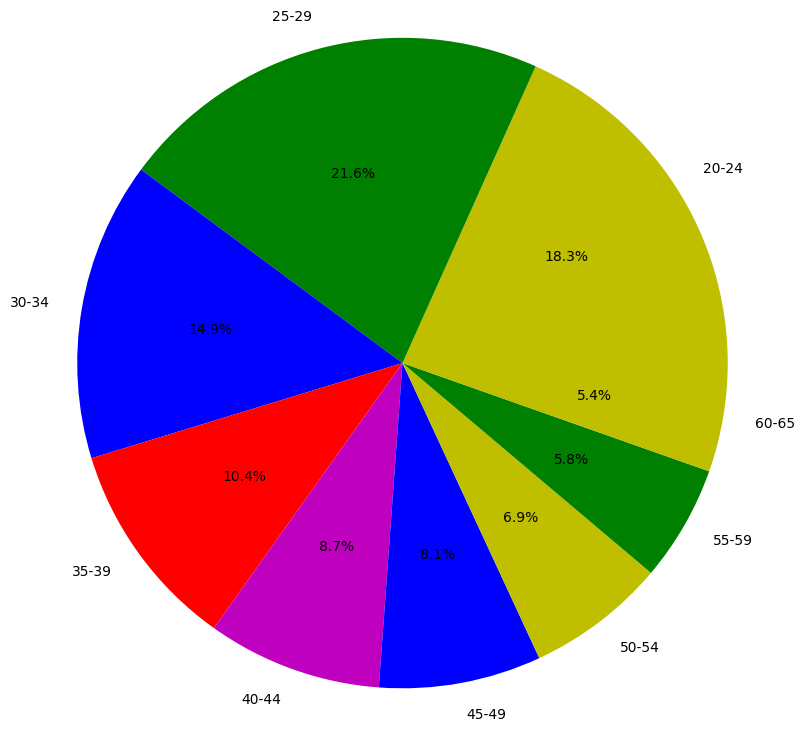

In [34]:
#visualize group wise data distribution

age = [x,y,z,a,b,c,d,e,f]
labels = ['20-24','25-29','30-34','35-39','40-44','45-49','50-54','55-59','60-65']
colors = [ 'y', 'g','b','r','m','b','y','g']
plt.pie(age,labels = labels,colors = colors,radius=2.2,autopct='%.1f%%')
plt.show()

In [35]:
df.head()

,dob,photo_taken,full_path,gender,age,path,ageclass
0,723671,2009,[17/10000217_1981-05-05_2009.jpg],1.0,28,/Users/rachana/Rachana_Python_VS/age_detection...,1
2,711677,2008,[12/100012_1948-07-03_2008.jpg],1.0,60,/Users/rachana/Rachana_Python_VS/age_detection...,8
4,720044,2012,[16/10002116_1971-05-31_2012.jpg],0.0,41,/Users/rachana/Rachana_Python_VS/age_detection...,4
5,716189,2012,[02/10002702_1960-11-09_2012.jpg],0.0,52,/Users/rachana/Rachana_Python_VS/age_detection...,6
6,707745,1971,[41/10003541_1937-09-27_1971.jpg],1.0,34,/Users/rachana/Rachana_Python_VS/age_detection...,2


## Image Data Generator

Image Data Generator is used to artificially expand a dataset by creating modified versions of images or other data points.It is a powerful technique that can help improve the performance, generalization, and robustness of machine learning models

**Note: Only augment images in train set. Validation/test set images must not be augmented.**

In [36]:
df['ageclass'] = df['ageclass'].astype(str)

In [44]:
# Split the DataFrame into train and test
train, test = train_test_split(df, test_size=0.2, random_state=42)

# Create an ImageDataGenerator with data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Flow from DataFrame for training
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train,
    x_col='path',
    y_col='ageclass',
    target_size=(198, 198),
    batch_size=64,
    class_mode='categorical',  # Use 'categorical' for multi-class classification
    shuffle=True
)

# Flow from DataFrame for testing
test_generator = test_datagen.flow_from_dataframe(
    dataframe=test,
    x_col='path',
    y_col='ageclass',
    target_size=(198, 198),
    batch_size=64,
    class_mode='categorical',
    shuffle=False
)

# Check the sizes of the datasets
print("Train set size:", len(train))
print("Test set size:", len(test))
print("train_generator: ", len(train_generator))
print("test_generator: ", len(test_generator))

Found 23801 validated image filenames belonging to 9 classes.
Found 5951 validated image filenames belonging to 9 classes.
Train set size: 23801
Test set size: 5951
train_generator:  372
test_generator:  93


In [48]:
# Check the size of the original training set
print("Original train set size:", len(train))


# number of batches (len(train_generator)) multiplied by the batch size (train_generator.batch_size). 
#The train_generator generates augmented images on-the-fly, so the number of samples in the 
#augmented training set is essentially the number of batches multiplied by the batch size.
# Calculate the size of the augmented training set
augmented_train_size = len(train_generator) * train_generator.batch_size
print("Augmented train set size:", augmented_train_size)


Original train set size: 23801
Augmented train set size: 23808


In [49]:
# Check the size of the original training set
print("Original test set size:", len(test ))

# Calculate the size of the augmented training set
augmented_test_size = len(test_generator) * test_generator.batch_size
print("Augmented test set size:", augmented_test_size)


Original test set size: 5951
Augmented test set size: 5952


The sizes are similar because the augmentation is applied on-the-fly during training. Each epoch during training, the generator takes the original images, applies random transformations defined in ImageDataGenerator, and creates augmented images. Since the augmentation is random, the number of augmented images is different for each batch and each epoch, but overall, the size of the augmented training set is similar to the original training set.

## Model Architecture
Age estimation is a classification problem in our case as we have devided the numbers in 5 classes, but if there is number as one class then its regression problem



### Define the Model

In [ ]:
# # Define a CNN model with dropout and regularization
# model = models.Sequential([
#     layers.Conv2D(64,   (3, 3), activation='relu', input_shape=(198, 198, 3)),
#     layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(128, (3, 3), activation='relu'),
#     layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(128, (3, 3), activation='relu'),
#     layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(256, (3, 3), activation='relu'),
#     layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(256, (3, 3), activation='relu'),
#     layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(256, (3, 3), activation='relu'),
#     layers.MaxPooling2D((2, 2)),

#     layers.Flatten(),
#     layers.Dropout(0.3),  # Reduced dropout rate
#     layers.Dense(256, kernel_regularizer=l2(0.03),activation='relu',),
#     layers.Dropout(0.3),  # Reduced dropout rate
#     layers.Dense(128, kernel_regularizer=l2(0.01), activation='relu'),
#     layers.Dropout(0.3),  # Reduced dropout rate
#     layers.Dense(9, activation='softmax')
# ])

In [ ]:
# from tensorflow.keras.regularizers import l2
# unique-roo-49
# model = models.Sequential([
#     layers.Conv2D(64, (3, 3), activation='relu', input_shape=(198, 198, 3)),
#     layers.BatchNormalization(),
#     layers.AveragePooling2D((2, 2)),
#     layers.Conv2D(128, (3, 3), activation='relu'),
#     layers.BatchNormalization(),
#     layers.AveragePooling2D((2, 2)),
#     layers.Conv2D(128, (3, 3), activation='relu'),
#     layers.BatchNormalization(),
#     layers.AveragePooling2D((2, 2)),
#     layers.Conv2D(256, (3, 3), activation='relu'),
#     layers.BatchNormalization(),
#     layers.AveragePooling2D((2, 2)),
#     layers.Conv2D(256, (3, 3), activation='relu'),
#     layers.BatchNormalization(),
#     layers.AveragePooling2D((2, 2)),
#     layers.Conv2D(256, (3, 3), activation='relu'),
#     layers.BatchNormalization(),
#     layers.AveragePooling2D((2, 2)),
#     layers.Flatten(),
#     layers.Dropout(0.3),  # Reduced dropout rate
#     layers.Dense(256, kernel_regularizer=l2(0.01), activation='relu'),
#     layers.Dropout(0.3),  # Reduced dropout rate
#     layers.Dense(128, kernel_regularizer=l2(0.01), activation='relu'),
#     layers.Dropout(0.3),  # Reduced dropout rate
#     layers.Dense(9, activation='softmax')
# ])

In [ ]:
# from tensorflow.keras.regularizers import l2 #blushing-wren-916//blushing +20=beautiful-whale-805

# model = models.Sequential([
#     layers.Conv2D(64, (3, 3), activation='relu', input_shape=(198, 198, 3)),
#     layers.BatchNormalization(),
#     layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(128, (3, 3), activation='relu'),
#     layers.BatchNormalization(),
#     layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(128, (3, 3), activation='relu'),
#     layers.BatchNormalization(),
#     layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(256, (3, 3), activation='relu'),
#     layers.BatchNormalization(),
#     layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(256, (3, 3), activation='relu'),
#     layers.BatchNormalization(),
#     layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(256, (3, 3), activation='relu'),
#     layers.BatchNormalization(),
#     layers.MaxPooling2D((2, 2)),
#     layers.GlobalAveragePooling2D(),
#     layers.Flatten(),
#     layers.Dropout(0.2),  # Reduced dropout rate
#     layers.Dense(256, kernel_regularizer=l2(0.01), activation='relu'),
#     layers.Dropout(0.2),  # Reduced dropout rate
#     layers.Dense(128, kernel_regularizer=l2(0.01), activation='relu'),
#     layers.Dropout(0.2),  # Reduced dropout rate
#     layers.Dense(9, activation='softmax')
# ])

In [ ]:
# from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau #classy-boar-858

# # Define the model
# model = models.Sequential([
#     layers.Conv2D(64, (3, 3), activation='relu', input_shape=(198, 198, 3)),
#     layers.BatchNormalization(),
#     layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(128, (3, 3), activation='relu'),
#     layers.BatchNormalization(),
#     layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(128, (3, 3), activation='relu'),
#     layers.BatchNormalization(),
#     layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(256, (3, 3), activation='relu'),
#     layers.BatchNormalization(),
#     layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(256, (3, 3), activation='relu'),
#     layers.BatchNormalization(),
#     layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(256, (3, 3), activation='relu'),
#     layers.BatchNormalization(),
#     layers.MaxPooling2D((2, 2)),
#     layers.GlobalAveragePooling2D(),
#     layers.Flatten(),
#     layers.Dropout(0.5),
#     layers.Dense(256, kernel_regularizer=l2(0.01), activation='relu'),
#     layers.Dropout(0.5),
#     layers.Dense(128, kernel_regularizer=l2(0.01), activation='relu'),
#     layers.Dropout(0.5),
#     layers.Dense(9, activation='softmax')
# ])

In [ ]:
# Define a CNN model with dropout and regularization// amusing-stoat-491 //masked-croc-751-134//
model = models.Sequential([
    layers.Conv2D(64,   (3, 3), activation='relu', input_shape=(198, 198, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),


    layers.Flatten(),
    layers.Dropout(0.3), 
    layers.Dense(256, kernel_regularizer=l2(0.01),activation='relu',),
    layers.Dropout(0.3),  
    layers.Dense(128, kernel_regularizer=l2(0.01), activation='relu'),
    layers.Dropout(0.3), 
    layers.Dense(9, activation='softmax')
])

In [ ]:
# from tensorflow.keras.layers import Conv2D, AveragePooling2D, GlobalAveragePooling2D capricious-sheep-1

# model = Sequential()

# # Input layer with 32 filters, followed by an AveragePooling2D layer.
# model.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(198, 198, 3)))    # 3rd dim = 1 for grayscale images.
# model.add(AveragePooling2D(pool_size=(2,2)))

# # Three Conv2D layers with filters increasing by a factor of 2 for every successive Conv2D layer.
# model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
# model.add(AveragePooling2D(pool_size=(2,2)))

# model.add(Conv2D(filters=128, kernel_size=3, activation='relu'))
# model.add(AveragePooling2D(pool_size=(2,2)))

# model.add(Conv2D(filters=256, kernel_size=3, activation='relu'))
# model.add(AveragePooling2D(pool_size=(2,2)))

# # A GlobalAveragePooling2D layer before going into Dense layers below.
# # GlobalAveragePooling2D layer gives no. of outputs equal to no. of filters in last Conv2D layer above (256).
# model.add(GlobalAveragePooling2D())

# # One Dense layer with 132 nodes so as to taper down the no. of nodes from no. of outputs of GlobalAveragePooling2D layer above towards no. of nodes in output layer below (7).
# model.add(Dense(132, activation='relu'))

# # Output layer with 9 nodes (equal to the no. of classes).
# model.add(Dense(9, activation='softmax'))



In [ ]:
# # Define a CNN model with dropout and regularization //with class bouncy-snail-215 no bacth
# model = models.Sequential([
#     layers.Conv2D(64,   (3, 3), activation='relu', input_shape=(198, 198, 3)),
#     layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(128, (3, 3), activation='relu'),
#     layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(128, (3, 3), activation='relu'),
#     layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(256, (3, 3), activation='relu'),
#     layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(256, (3, 3), activation='relu'),
#     layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(256, (3, 3), activation='relu'),
#     layers.MaxPooling2D((2, 2)),

#     layers.Flatten(),
#     layers.Dropout(0.3),  # Reduced dropout rate
#     layers.Dense(256, kernel_regularizer=l2(0.03),activation='relu',),
#     layers.Dropout(0.3),  # Reduced dropout rate
#     layers.Dense(128, kernel_regularizer=l2(0.01), activation='relu'),
#     layers.Dropout(0.3),  # Reduced dropout rate
#     layers.Dense(9, activation='softmax')
# ])

In [ ]:
# # Define a CNN model with dropout and regularization// amusing-stoat-491 //masked-croc-751-134//resilient-tern-625 with class ba64//redolent-loon-532 without bc and with c//omniscient-bird-600 class nonebatc 0.3//rellient with 50=fearless-panda-748
# model = models.Sequential([
#     layers.Conv2D(64,   (3, 3), activation='relu', input_shape=(198, 198, 3)),
#     layers.BatchNormalization(),
#     layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(128, (3, 3), activation='relu'),
#     layers.BatchNormalization(),
#     layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(128, (3, 3), activation='relu'),
#     layers.BatchNormalization(),
#     layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(256, (3, 3), activation='relu'),
#     layers.BatchNormalization(),
#     layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(256, (3, 3), activation='relu'),
#     layers.BatchNormalization(),
#     layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(256, (3, 3), activation='relu'),
#     layers.BatchNormalization(),
#     layers.MaxPooling2D((2, 2)),


#     layers.Flatten(),
#     layers.Dropout(0.3),  # Reduced dropout rate
#     layers.Dense(256, kernel_regularizer=l2(0.01),activation='relu',),
#     layers.Dropout(0.3),  # Reduced dropout rate
#     layers.Dense(128, kernel_regularizer=l2(0.01), activation='relu'),
#     layers.Dropout(0.3),  # Reduced dropout rate
#     layers.Dense(9, activation='softmax')
# ])

### Compile the Model

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# convert class labels to on-hot encoding# conve
from keras.utils import to_categorical
Y = to_categorical(np.array(df['ageclass']) ,9)

### Train the Model

In [ ]:
# # Add early stopping and model checkpoint callbacks
# early_stopping = callbacks.EarlyStopping(
#     monitor='val_loss',
#     patience=3,
#     restore_best_weights=True
# )


In [ ]:
from keras import callbacks
filepath="/content/drive/MyDrive/Rachana/model/mlflow/age_estimation_v3_mlflow_model_amusing_add.h5"
# Creating a TensorBoard callback object and saving it at the desired location.

checkpoint = callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

In [ ]:
# Train the model
history = model.fit(train_generator,
    batch_size=64,
    epochs=200,
    validation_data=test_generator,
    callbacks=[checkpoint]
)


2024/02/27 05:46:35 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '69a4b5999d144fd48565e23e819d6928', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current tensorflow workflow
2024/02/27 05:46:37 WARNING mlflow.tensorflow: Unrecognized dataset type <class 'keras.src.preprocessing.image.DataFrameIterator'>. Dataset logging skipped.
2024/02/27 05:46:37 WARNING mlflow.tensorflow: Unrecognized dataset type <class 'keras.src.preprocessing.image.DataFrameIterator'>. Dataset logging skipped.


Epoch 1/200
132/372 [=========>....................] - ETA: 3:16 - loss: 5.2027 - accuracy: 0.1884

/usr/local/lib/python3.10/dist-packages/PIL/TiffImagePlugin.py:858: UserWarning: Corrupt EXIF data.  Expecting to read 2 bytes but only got 0. 
  warnings.warn(str(msg))


372/372 [==============================] - ETA: 0s - loss: 3.7356 - accuracy: 0.2003
Epoch 1: val_loss improved from inf to 2.41840, saving model to /content/drive/MyDrive/Rachana/model/mlflow/age_estimation_v3_mlflow_model_amusing.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


372/372 [==============================] - 350s 901ms/step - loss: 3.7356 - accuracy: 0.2003 - val_loss: 2.4184 - val_accuracy: 0.1810
Epoch 2/200
372/372 [==============================] - ETA: 0s - loss: 2.1206 - accuracy: 0.2169
Epoch 2: val_loss improved from 2.41840 to 2.12897, saving model to /content/drive/MyDrive/Rachana/model/mlflow/age_estimation_v3_mlflow_model_amusing.h5
372/372 [==============================] - 339s 910ms/step - loss: 2.1206 - accuracy: 0.2169 - val_loss: 2.1290 - val_accuracy: 0.1823
Epoch 3/200
372/372 [==============================] - ETA: 0s - loss: 2.0172 - accuracy: 0.2185
Epoch 3: val_loss improved from 2.12897 to 2.07846, saving model to /content/drive/MyDrive/Rachana/model/mlflow/age_estimation_v3_mlflow_model_amusing.h5
372/372 [==============================] - 335s 901ms/step - loss: 2.0172 - accuracy: 0.2185 - val_loss: 2.0785 - val_accuracy: 0.2050
Epoch 4/200
372/372 [==============================] - ETA: 0s - loss: 1.9945 - accuracy: 0.2

372/372 [==============================] - 300s 807ms/step - loss: 1.2193 - accuracy: 0.4909 - val_loss: 2.2132 - val_accuracy: 0.2885
Epoch 167/200
372/372 [==============================] - ETA: 0s - loss: 1.2225 - accuracy: 0.4903
Epoch 167: val_loss did not improve from 1.71447
372/372 [==============================] - 298s 800ms/step - loss: 1.2225 - accuracy: 0.4903 - val_loss: 2.1534 - val_accuracy: 0.2907
Epoch 168/200
372/372 [==============================] - ETA: 0s - loss: 1.2191 - accuracy: 0.4934
Epoch 168: val_loss did not improve from 1.71447
372/372 [==============================] - 300s 805ms/step - loss: 1.2191 - accuracy: 0.4934 - val_loss: 2.1526 - val_accuracy: 0.2926
Epoch 169/200
372/372 [==============================] - ETA: 0s - loss: 1.2232 - accuracy: 0.4852
Epoch 169: val_loss did not improve from 1.71447
372/372 [==============================] - 302s 811ms/step - loss: 1.2232 - accuracy: 0.4852 - val_loss: 2.2042 - val_accuracy: 0.2736
Epoch 170/200
37

372/372 [==============================] - 301s 810ms/step - loss: 1.1901 - accuracy: 0.5054 - val_loss: 2.2771 - val_accuracy: 0.2752
Epoch 184/200
372/372 [==============================] - ETA: 0s - loss: 1.1905 - accuracy: 0.5035
Epoch 184: val_loss did not improve from 1.71447
372/372 [==============================] - 303s 813ms/step - loss: 1.1905 - accuracy: 0.5035 - val_loss: 2.3119 - val_accuracy: 0.2887
Epoch 185/200
372/372 [==============================] - ETA: 0s - loss: 1.1869 - accuracy: 0.5039
Epoch 185: val_loss did not improve from 1.71447
372/372 [==============================] - 304s 816ms/step - loss: 1.1869 - accuracy: 0.5039 - val_loss: 2.2257 - val_accuracy: 0.2882
Epoch 186/200
372/372 [==============================] - ETA: 0s - loss: 1.1749 - accuracy: 0.5137
Epoch 186: val_loss did not improve from 1.71447
372/372 [==============================] - 302s 813ms/step - loss: 1.1749 - accuracy: 0.5137 - val_loss: 2.3866 - val_accuracy: 0.2754
Epoch 187/200
37

2024/02/27 23:50:41 WARNING mlflow.tensorflow: Failed to infer model signature: could not sample data to infer model signature: '>=' not supported between instances of 'slice' and 'int'
2024/02/27 23:50:41 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.
2024/02/27 23:50:54 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/usr/local/lib/python3.10/dist-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils."


In [ ]:
# Saving the model as a h5 file for possible use later.

model.save(f"/content/drive/MyDrive/Rachana/model/age_estimation_v3_MLFlow_200_amusing_accuracy.h5", save_format='h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
history = model.fit(train_generator,
    epochs=50,
    validation_data=test_generator,
    callbacks=[checkpoint]
)

2024/02/29 20:23:35 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '0348106254074e8f9ab396faf65c52fa', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current tensorflow workflow
2024/02/29 20:23:36 WARNING mlflow.tensorflow: Unrecognized dataset type <class 'keras.src.preprocessing.image.DataFrameIterator'>. Dataset logging skipped.
2024/02/29 20:23:36 WARNING mlflow.tensorflow: Unrecognized dataset type <class 'keras.src.preprocessing.image.DataFrameIterator'>. Dataset logging skipped.


Epoch 1/50
341/372 [==========================>...] - ETA: 26s - loss: 1.4746 - accuracy: 0.3645

/usr/local/lib/python3.10/dist-packages/PIL/TiffImagePlugin.py:858: UserWarning: Corrupt EXIF data.  Expecting to read 2 bytes but only got 0. 
  warnings.warn(str(msg))


372/372 [==============================] - ETA: 0s - loss: 1.4761 - accuracy: 0.3650
Epoch 1: val_loss did not improve from 1.73611
372/372 [==============================] - 338s 908ms/step - loss: 1.4761 - accuracy: 0.3650 - val_loss: 2.0419 - val_accuracy: 0.2610
Epoch 2/50
372/372 [==============================] - ETA: 0s - loss: 1.4829 - accuracy: 0.3709
Epoch 2: val_loss did not improve from 1.73611
372/372 [==============================] - 319s 854ms/step - loss: 1.4829 - accuracy: 0.3709 - val_loss: 1.9319 - val_accuracy: 0.2838
Epoch 3/50
372/372 [==============================] - ETA: 0s - loss: 1.4787 - accuracy: 0.3734
Epoch 3: val_loss did not improve from 1.73611
372/372 [==============================] - 310s 834ms/step - loss: 1.4787 - accuracy: 0.3734 - val_loss: 1.9468 - val_accuracy: 0.2991
Epoch 4/50
372/372 [==============================] - ETA: 0s - loss: 1.4778 - accuracy: 0.3719
Epoch 4: val_loss did not improve from 1.73611
372/372 [=========================

372/372 [==============================] - 312s 839ms/step - loss: 1.4560 - accuracy: 0.3783 - val_loss: 1.9458 - val_accuracy: 0.2932
Epoch 17/50
372/372 [==============================] - ETA: 0s - loss: 1.4496 - accuracy: 0.3745
Epoch 17: val_loss did not improve from 1.73611
372/372 [==============================] - 326s 875ms/step - loss: 1.4496 - accuracy: 0.3745 - val_loss: 2.0037 - val_accuracy: 0.2621
Epoch 18/50
372/372 [==============================] - ETA: 0s - loss: 1.4496 - accuracy: 0.3831
Epoch 18: val_loss did not improve from 1.73611
372/372 [==============================] - 324s 871ms/step - loss: 1.4496 - accuracy: 0.3831 - val_loss: 1.9616 - val_accuracy: 0.2845
Epoch 19/50
372/372 [==============================] - ETA: 0s - loss: 1.4384 - accuracy: 0.3842
Epoch 19: val_loss did not improve from 1.73611
372/372 [==============================] - 334s 897ms/step - loss: 1.4384 - accuracy: 0.3842 - val_loss: 1.9884 - val_accuracy: 0.2793
Epoch 20/50
372/372 [====

2024/03/01 00:58:37 WARNING mlflow.tensorflow: Failed to infer model signature: could not sample data to infer model signature: '>=' not supported between instances of 'slice' and 'int'
2024/03/01 00:58:37 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


In [ ]:

model.save(f"/Users/rachana/Rachana_Python_VS/age_detection/model/age_estimation_v3_mlflow_modeladding in amu200.h5", save_format='h5')

In [ ]:
# Checking the train and test loss and accuracy values from the neural network above.

train_loss = history.history['loss']
test_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
test_accuracy = history.history['val_accuracy']

In [ ]:
# Plotting a line chart to visualize the loss and accuracy values by epochs.

fig, ax = plt.subplots(ncols=2, figsize=(15,7))

ax = ax.ravel()

ax[0].plot(train_loss, label='Train Loss', color='royalblue', marker='o', markersize=5)
ax[0].plot(test_loss, label='Test Loss', color = 'orangered', marker='o', markersize=5)

ax[0].set_xlabel('Epochs', fontsize=14)
ax[0].set_ylabel('Categorical Crossentropy', fontsize=14)

ax[0].legend(fontsize=14)
ax[0].tick_params(axis='both', labelsize=12)

ax[1].plot(train_accuracy, label='Train Accuracy', color='royalblue', marker='o', markersize=5)
ax[1].plot(test_accuracy, label='Test Accuracy', color='orangered', marker='o', markersize=5)

ax[1].set_xlabel('Epochs', fontsize=14)
ax[1].set_ylabel('Accuracy', fontsize=14)

ax[1].legend(fontsize=14)
ax[1].tick_params(axis='both', labelsize=12)

fig.suptitle(x=0.5, y=0.92, t="Lineplots showing loss and accuracy of CNN model by epochs", fontsize=16)

# Exporting plot image in PNG format.
plt.savefig('/content/drive/MyDrive/Rachana/model/age_estimation_v3_MLFlow_resillant add_loss_accuracy.png', bbox_inches='tight');

In [ ]:

# Evaluate the model
test_loss, test_acc = addmodel.evaluate(test_generator, steps=len(test_generator))
print(f'Test loss: {test_loss}, Test accuracy: {test_acc}')

# Get predictions
y_pred = addmodel.predict(test_generator)
y_pred = np.argmax(y_pred, axis=1)

# Get true labels
y_true = test_generator.classes


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Print confusion matrix and classification report
print("Confusion Matrix:")
print(confusion_matrix(y_true, y_pred))

print("\nClassification Report:")
print(classification_report(y_true, y_pred))

In [ ]:
# See your experiments table inside Colab!
import IPython
display(IPython.display.IFrame("https://dagshub.com/"+ os.environ['MLFLOW_TRACKING_USERNAME']
                        + '/' + os.environ['MLFLOW_TRACKING_PROJECTNAME'] + "/experiments/#/",'100%',600))

## Age Estimation based on Provided Image

In [2]:
new_model = load_model('/Users/rachana/Rachana_Python_VS/age_detection_version2/Docker_Deployement_file/models/age_estimation_v3_mlflow_modeladding in amu200.h5')

2024-03-08 11:29:57.593384: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2024-03-08 11:29:57.593412: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-03-08 11:29:57.593420: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-03-08 11:29:57.593697: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-03-08 11:29:57.594149: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [ ]:
import cv2
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

def loadImage(filepath):
    test_img = image.load_img(filepath, target_size=(198, 198))
    test_img = image.img_to_array(test_img)
    test_img = np.expand_dims(test_img, axis=0)
    test_img /= 255
    return test_img

def cropFace(image_path):
    img = cv2.imread(image_path)
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    if len(faces) == 1:  # Only proceed if exactly one face is detected
        x, y, w, h = faces[0]
        cropped_img = img[y:y+h, x:x+w]
        return cropped_img
    else:
        return None
picture = "/Users/rachana/Rachana_Python_VS/age_detection_version2/Docker_Deployement_file/uploads/Kim_Kardashian_West_2014_33.jpeg"

cropped_img = cropFace(picture)
if cropped_img is not None:
    age_pred = new_model.predict(loadImage(picture))
    plt.imshow(cv2.cvtColor(cropped_img, cv2.COLOR_BGR2RGB))
    plt.show()
    max = -1
    count = 0

    for i in age_pred[0]:
        if i > max:
            max = i
            temp = count
        count += 1

    if temp == 0:
        print('20-24 years old')
    if temp == 1:
        print('25-29 years old')
    if temp == 2:
        print('30-34 years old')
    if temp == 3:
        print('35-39 years old')
    if temp == 4:
        print('40-45 years old')
    if temp == 5:
        print('45-49 years old')
    if temp == 6:
        print('50-54 years old')
    if temp == 7:
        print('55-59 years old')
    if temp == 8:
        print('60-65 years old')
else:
    print("No face detected or Multiple faces detected in the image, Please upload an image with exactly one human face!")


1/1 [==============================] - 0s 16ms/step


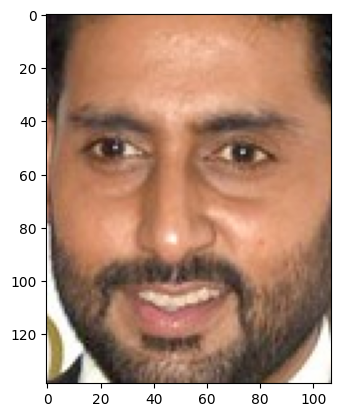

Predicted Age :  35-39 
Probabilities : ['20-24 years old: 0.0100', '25-29 years old: 0.1000', '30-34 years old: 0.3700', '35-39 years old: 0.3800', '40-44 years old: 0.1100', '45-49 years old: 0.0200', '50-54 years old: 0.0100', '55-59 years old: 0.0000', '60-65 years old: 0.0000']


In [38]:
import cv2
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from mtcnn import MTCNN

def load_and_preprocess_image(filepath):
    test_img = image.load_img(filepath, target_size=(198, 198))
    test_img = image.img_to_array(test_img)
    test_img = np.expand_dims(test_img, axis=0)
    test_img /= 255
    return test_img

def detect_and_crop_face(image_path):
    img = cv2.imread(image_path)
    detector = MTCNN()
    result = detector.detect_faces(img)
    
    if len(result) == 1:
        x, y, w, h = result[0]['box']
        cropped_img = img[y:y+h, x:x+w]
        return cropped_img
    else:
        return None



def predict_age_from_image(image_path, model):
    cropped_img = detect_and_crop_face(image_path)
    prb_age = []  # Initialize prb_age here
    if cropped_img is not None:
        age_pred = model.predict(load_and_preprocess_image(image_path))
        age_pred_rounded = [round(prob, 2) for prob in age_pred[0]]
        age_classes = ['20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-65']
        max_prob_index = np.argmax(age_pred[0])
        max_age_class = age_classes[max_prob_index]
        
        plt.imshow(cv2.cvtColor(cropped_img, cv2.COLOR_BGR2RGB))
        plt.show()
        
        # print("Probabilities :", age_classes)
        # print("Probabilities :", age_pred_rounded)
        # print(f'Most probable age group: {max_age_class}')
              
        # Print predicted age probabilities
        for i, prob in enumerate(age_pred_rounded):
            prb_age.append(f"{age_classes[i]} years old: {prob:.4f}")



        # Get the index of the maximum probability
        max_age_index = np.argmax(age_pred)

        # Print predicted age
        predicted_age = age_classes[max_age_index]

        #print('Predicted Age i: ', predicted_age ,'Probabilities i :',prb_age)
    else:
        predicted_age= ("No face detected or Multiple faces detected in the image, Please upload an image with one human face!")
        
    print('Predicted Age : ', predicted_age  ,'\nProbabilities :',prb_age)

#uploade image

picture = "/Users/rachana/Rachana_Python_VS/age_detection_version2/Docker_Deployement_file/uploads/Abhishek_Bachchan_39.jpeg"
predict_age_from_image(picture,new_model)


1/1 [==============================] - 0s 18ms/step


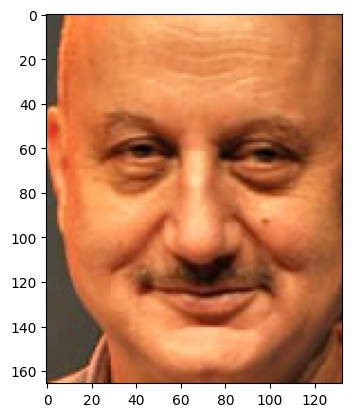

Predicted Age :  50-54 
Probabilities : ['20-24 years old: 0.0000', '25-29 years old: 0.0000', '30-34 years old: 0.0000', '35-39 years old: 0.0000', '40-44 years old: 0.0100', '45-49 years old: 0.1600', '50-54 years old: 0.4400', '55-59 years old: 0.2900', '60-65 years old: 0.1000']


In [39]:
import cv2
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from mtcnn import MTCNN

def load_and_preprocess_image(filepath):
    test_img = image.load_img(filepath, target_size=(198, 198))
    test_img = image.img_to_array(test_img)
    test_img = np.expand_dims(test_img, axis=0)
    test_img /= 255
    return test_img

def detect_and_crop_face(image_path):
    img = cv2.imread(image_path)
    detector = MTCNN()
    result = detector.detect_faces(img)
    
    if len(result) == 1:
        x, y, w, h = result[0]['box']
        cropped_img = img[y:y+h, x:x+w]
        return cropped_img
    else:
        return None



def predict_age_from_image(image_path, model):
    cropped_img = detect_and_crop_face(image_path)
    prb_age = []  # Initialize prb_age here
    if cropped_img is not None:
        age_pred = model.predict(load_and_preprocess_image(image_path))
        age_pred_rounded = [round(prob, 2) for prob in age_pred[0]]
        age_classes = ['20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-65']
        max_prob_index = np.argmax(age_pred[0])
        max_age_class = age_classes[max_prob_index]
        
        plt.imshow(cv2.cvtColor(cropped_img, cv2.COLOR_BGR2RGB))
        plt.show()
        
        # print("Probabilities :", age_classes)
        # print("Probabilities :", age_pred_rounded)
        # print(f'Most probable age group: {max_age_class}')
              
        # Print predicted age probabilities
        for i, prob in enumerate(age_pred_rounded):
            prb_age.append(f"{age_classes[i]} years old: {prob:.4f}")



        # Get the index of the maximum probability
        max_age_index = np.argmax(age_pred)

        # Print predicted age
        predicted_age = age_classes[max_age_index]

        #print('Predicted Age i: ', predicted_age ,'Probabilities i :',prb_age)
    else:
        predicted_age= ("No face detected or Multiple faces detected in the image, Please upload an image with one human face!")
        
    print('Predicted Age : ', predicted_age  ,'\nProbabilities :',prb_age)

#uploade image

picture = "/Users/rachana/Rachana_Python_VS/age_detection_version2/Docker_Deployement_file/uploads/AnupamKher5_58.jpeg"
predict_age_from_image(picture,new_model)


1/1 [==============================] - 0s 16ms/step


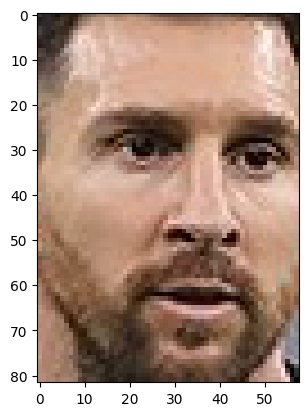

Predicted Age :  30-34 
Probabilities : ['20-24 years old: 0.0000', '25-29 years old: 0.4500', '30-34 years old: 0.5400', '35-39 years old: 0.0100', '40-44 years old: 0.0000', '45-49 years old: 0.0000', '50-54 years old: 0.0000', '55-59 years old: 0.0000', '60-65 years old: 0.0000']


In [40]:
import cv2
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from mtcnn import MTCNN

def load_and_preprocess_image(filepath):
    test_img = image.load_img(filepath, target_size=(198, 198))
    test_img = image.img_to_array(test_img)
    test_img = np.expand_dims(test_img, axis=0)
    test_img /= 255
    return test_img

def detect_and_crop_face(image_path):
    img = cv2.imread(image_path)
    detector = MTCNN()
    result = detector.detect_faces(img)
    
    if len(result) == 1:
        x, y, w, h = result[0]['box']
        cropped_img = img[y:y+h, x:x+w]
        return cropped_img
    else:
        return None



def predict_age_from_image(image_path, model):
    cropped_img = detect_and_crop_face(image_path)
    prb_age = []  # Initialize prb_age here
    if cropped_img is not None:
        age_pred = model.predict(load_and_preprocess_image(image_path))
        age_pred_rounded = [round(prob, 2) for prob in age_pred[0]]
        age_classes = ['20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-65']
        max_prob_index = np.argmax(age_pred[0])
        max_age_class = age_classes[max_prob_index]
        
        plt.imshow(cv2.cvtColor(cropped_img, cv2.COLOR_BGR2RGB))
        plt.show()
        
        # print("Probabilities :", age_classes)
        # print("Probabilities :", age_pred_rounded)
        # print(f'Most probable age group: {max_age_class}')
              
        # Print predicted age probabilities
        for i, prob in enumerate(age_pred_rounded):
            prb_age.append(f"{age_classes[i]} years old: {prob:.4f}")



        # Get the index of the maximum probability
        max_age_index = np.argmax(age_pred)

        # Print predicted age
        predicted_age = age_classes[max_age_index]

        #print('Predicted Age i: ', predicted_age ,'Probabilities i :',prb_age)
    else:
        predicted_age= ("No face detected or Multiple faces detected in the image, Please upload an image with one human face!")
        
    print('Predicted Age : ', predicted_age  ,'\nProbabilities :',prb_age)

#uploade image

picture = "/Users/rachana/Rachana_Python_VS/age_detection_version2/Docker_Deployement_file/uploads/Lionel-Messi-Argentina-2022-FIFA-World-Cup_cropped_34.jpeg"
predict_age_from_image(picture,new_model)


1/1 [==============================] - 0s 15ms/step


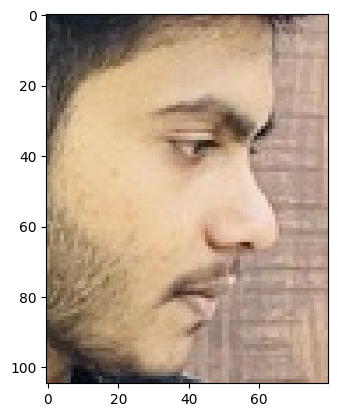

Predicted Age :  35-39 
Probabilities : ['20-24 years old: 0.0200', '25-29 years old: 0.0800', '30-34 years old: 0.2700', '35-39 years old: 0.3700', '40-44 years old: 0.1700', '45-49 years old: 0.0600', '50-54 years old: 0.0200', '55-59 years old: 0.0000', '60-65 years old: 0.0000']


In [17]:
import cv2
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from mtcnn import MTCNN

def load_and_preprocess_image(filepath):
    test_img = image.load_img(filepath, target_size=(198, 198))
    test_img = image.img_to_array(test_img)
    test_img = np.expand_dims(test_img, axis=0)
    test_img /= 255
    return test_img

def detect_and_crop_face(image_path):
    img = cv2.imread(image_path)
    detector = MTCNN()
    result = detector.detect_faces(img)
    
    if len(result) == 1:
        x, y, w, h = result[0]['box']
        cropped_img = img[y:y+h, x:x+w]
        return cropped_img
    else:
        return None

def predict_age_from_image(image_path, model):
    cropped_img = detect_and_crop_face(image_path)
    prb_age = []  # Initialize prb_age here
    if cropped_img is not None:
        age_pred = model.predict(load_and_preprocess_image(image_path))
        age_pred_rounded = [round(prob, 2) for prob in age_pred[0]]
        age_classes = ['20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-65']
        max_prob_index = np.argmax(age_pred[0])
        max_age_class = age_classes[max_prob_index]
        
        plt.imshow(cv2.cvtColor(cropped_img, cv2.COLOR_BGR2RGB))
        plt.show()
        
        # print("Probabilities :", age_classes)
        # print("Probabilities :", age_pred_rounded)
        # print(f'Most probable age group: {max_age_class}')
              
        # Print predicted age probabilities
        for i, prob in enumerate(age_pred_rounded):
            prb_age.append(f"{age_classes[i]} years old: {prob:.4f}")



        # Get the index of the maximum probability
        max_age_index = np.argmax(age_pred)

        # Print predicted age
        predicted_age = age_classes[max_age_index]

        #print('Predicted Age i: ', predicted_age ,'Probabilities i :',prb_age)
    else:
        predicted_age= ("No face detected or Multiple faces detected in the image, Please upload an image with one human face!")
        
    print('Predicted Age : ', predicted_age  ,'\nProbabilities :',prb_age)

#uploade image

picture = "/Users/rachana/Rachana_Python_VS/age_detection_version2/Images/MicrosoftTeams-image (9).png"
predict_age_from_image(picture,new_model)


1/1 [==============================] - 0s 17ms/step


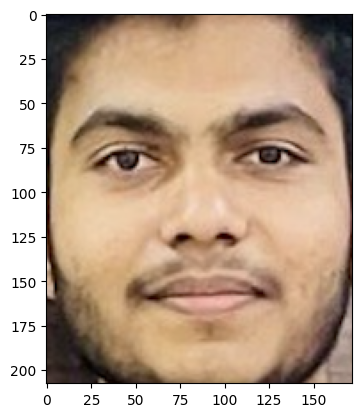

Predicted Age :  25-29 
Probabilities : ['20-24 years old: 0.4700', '25-29 years old: 0.5300', '30-34 years old: 0.0100', '35-39 years old: 0.0000', '40-44 years old: 0.0000', '45-49 years old: 0.0000', '50-54 years old: 0.0000', '55-59 years old: 0.0000', '60-65 years old: 0.0000']


In [41]:
import cv2
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from mtcnn import MTCNN

def load_and_preprocess_image(filepath):
    test_img = image.load_img(filepath, target_size=(198, 198))
    test_img = image.img_to_array(test_img)
    test_img = np.expand_dims(test_img, axis=0)
    test_img /= 255
    return test_img

def detect_and_crop_face(image_path):
    img = cv2.imread(image_path)
    detector = MTCNN()
    result = detector.detect_faces(img)
    
    if len(result) == 1:
        x, y, w, h = result[0]['box']
        cropped_img = img[y:y+h, x:x+w]
        return cropped_img
    else:
        return None

def predict_age_from_image(image_path, model):
    cropped_img = detect_and_crop_face(image_path)
    prb_age = []  # Initialize prb_age here
    if cropped_img is not None:
        age_pred = model.predict(load_and_preprocess_image(image_path))
        age_pred_rounded = [round(prob, 2) for prob in age_pred[0]]
        age_classes = ['20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-65']
        max_prob_index = np.argmax(age_pred[0])
        max_age_class = age_classes[max_prob_index]
        
        plt.imshow(cv2.cvtColor(cropped_img, cv2.COLOR_BGR2RGB))
        plt.show()
        
        # print("Probabilities :", age_classes)
        # print("Probabilities :", age_pred_rounded)
        # print(f'Most probable age group: {max_age_class}')
              
        # Print predicted age probabilities
        for i, prob in enumerate(age_pred_rounded):
            prb_age.append(f"{age_classes[i]} years old: {prob:.4f}")



        # Get the index of the maximum probability
        max_age_index = np.argmax(age_pred)

        # Print predicted age
        predicted_age = age_classes[max_age_index]

        #print('Predicted Age i: ', predicted_age ,'Probabilities i :',prb_age)
    else:
        predicted_age= ("No face detected or Multiple faces detected in the image, Please upload an image with one human face!")
        
    print('Predicted Age : ', predicted_age  ,'\nProbabilities :',prb_age)

#uploade image

picture = "/Users/rachana/Rachana_Python_VS/age_detection_version2/Images/Untitled.png"
predict_age_from_image(picture,new_model)


1/1 [==============================] - 0s 20ms/step


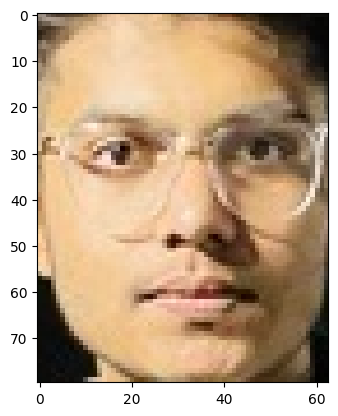

Predicted Age :  30-34 
Probabilities : ['20-24 years old: 0.1100', '25-29 years old: 0.2500', '30-34 years old: 0.3000', '35-39 years old: 0.1900', '40-44 years old: 0.0700', '45-49 years old: 0.0300', '50-54 years old: 0.0200', '55-59 years old: 0.0100', '60-65 years old: 0.0100']


In [18]:
import cv2
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from mtcnn import MTCNN

def load_and_preprocess_image(filepath):
    test_img = image.load_img(filepath, target_size=(198, 198))
    test_img = image.img_to_array(test_img)
    test_img = np.expand_dims(test_img, axis=0)
    test_img /= 255
    return test_img

def detect_and_crop_face(image_path):
    img = cv2.imread(image_path)
    detector = MTCNN()
    result = detector.detect_faces(img)
    
    if len(result) == 1:
        x, y, w, h = result[0]['box']
        cropped_img = img[y:y+h, x:x+w]
        return cropped_img
    else:
        return None



def predict_age_from_image(image_path, model):
    cropped_img = detect_and_crop_face(image_path)
    prb_age = []  # Initialize prb_age here
    if cropped_img is not None:
        age_pred = model.predict(load_and_preprocess_image(image_path))
        age_pred_rounded = [round(prob, 2) for prob in age_pred[0]]
        age_classes = ['20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-65']
        max_prob_index = np.argmax(age_pred[0])
        max_age_class = age_classes[max_prob_index]
        
        plt.imshow(cv2.cvtColor(cropped_img, cv2.COLOR_BGR2RGB))
        plt.show()
        
        # print("Probabilities :", age_classes)
        # print("Probabilities :", age_pred_rounded)
        # print(f'Most probable age group: {max_age_class}')
              
        # Print predicted age probabilities
        for i, prob in enumerate(age_pred_rounded):
            prb_age.append(f"{age_classes[i]} years old: {prob:.4f}")



        # Get the index of the maximum probability
        max_age_index = np.argmax(age_pred)

        # Print predicted age
        predicted_age = age_classes[max_age_index]

        #print('Predicted Age i: ', predicted_age ,'Probabilities i :',prb_age)
    else:
        predicted_age= ("No face detected or Multiple faces detected in the image, Please upload an image with one human face!")
        
    print('Predicted Age : ', predicted_age  ,'\nProbabilities :',prb_age)


picture = "/Users/rachana/Rachana_Python_VS/age_detection_version2/Images/MicrosoftTeams-image (10).png"
predict_age_from_image(picture,new_model)


1/1 [==============================] - 0s 15ms/step


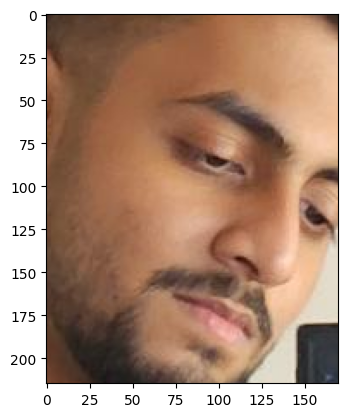

Predicted Age :  35-39 
Probabilities : ['20-24 years old: 0.0000', '25-29 years old: 0.0300', '30-34 years old: 0.2000', '35-39 years old: 0.4900', '40-44 years old: 0.2300', '45-49 years old: 0.0400', '50-54 years old: 0.0100', '55-59 years old: 0.0000', '60-65 years old: 0.0000']


In [19]:
import cv2
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from mtcnn import MTCNN

def load_and_preprocess_image(filepath):
    test_img = image.load_img(filepath, target_size=(198, 198))
    test_img = image.img_to_array(test_img)
    test_img = np.expand_dims(test_img, axis=0)
    test_img /= 255
    return test_img

def detect_and_crop_face(image_path):
    img = cv2.imread(image_path)
    detector = MTCNN()
    result = detector.detect_faces(img)
    
    if len(result) == 1:
        x, y, w, h = result[0]['box']
        cropped_img = img[y:y+h, x:x+w]
        return cropped_img
    else:
        return None



def predict_age_from_image(image_path, model):
    cropped_img = detect_and_crop_face(image_path)
    prb_age = []  # Initialize prb_age here
    if cropped_img is not None:
        age_pred = model.predict(load_and_preprocess_image(image_path))
        age_pred_rounded = [round(prob, 2) for prob in age_pred[0]]
        age_classes = ['20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-65']
        max_prob_index = np.argmax(age_pred[0])
        max_age_class = age_classes[max_prob_index]
        
        plt.imshow(cv2.cvtColor(cropped_img, cv2.COLOR_BGR2RGB))
        plt.show()
        
        # print("Probabilities :", age_classes)
        # print("Probabilities :", age_pred_rounded)
        # print(f'Most probable age group: {max_age_class}')
              
        # Print predicted age probabilities
        for i, prob in enumerate(age_pred_rounded):
            prb_age.append(f"{age_classes[i]} years old: {prob:.4f}")



        # Get the index of the maximum probability
        max_age_index = np.argmax(age_pred)

        # Print predicted age
        predicted_age = age_classes[max_age_index]

        #print('Predicted Age i: ', predicted_age ,'Probabilities i :',prb_age)
    else:
        predicted_age= ("No face detected or Multiple faces detected in the image, Please upload an image with one human face!")
        
    print('Predicted Age : ', predicted_age  ,'\nProbabilities :',prb_age)


# Example usage
picture = "/Users/rachana/Rachana_Python_VS/age_detection_version2/Images/MicrosoftTeams-image (11).png"
predict_age_from_image(picture,new_model)


1/1 [==============================] - 0s 21ms/step


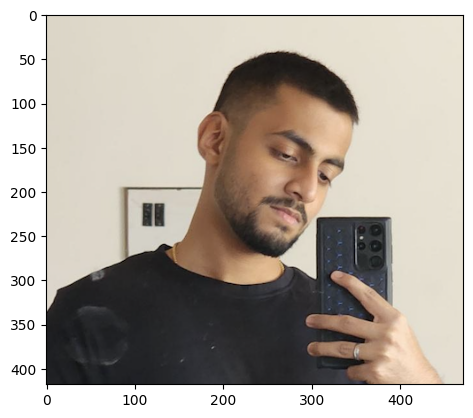

25-29 years old


In [47]:
#as we have train on model which covers front uppar half body face images so test side if we provide such images it will predict mostly right

def loadImage(filepath):
  test_img = image.load_img(filepath, target_size=(198, 198))
  test_img = image.img_to_array(test_img)
  test_img = np.expand_dims(test_img, axis = 0)
  test_img /= 255
  return test_img

picture = "/Users/rachana/Rachana_Python_VS/age_detection_version2/Images/Untitled4.png"
age_pred = new_model.predict(loadImage(picture))
img = image.load_img(picture)
plt.imshow(img)
plt.show()
max=-1
count=0

for i in age_pred[0]:
  if i>max:
    max = i
    temp = count
  count+=1

if temp==0:
  print('20-24 years old')
if temp==1:
  print('25-29 years old')
if temp==2:
  print('30-34 years old')
if temp==3:
  print('35-39 years old')
if temp==4:
  print('40-44 years old')
if temp==5:
  print('45-49 years old')
if temp==6:
  print('50-54 years old')
if temp==7:
  print('55-59 years old')
if temp==8:
  print('60-65 years old')


1/1 [==============================] - 0s 16ms/step


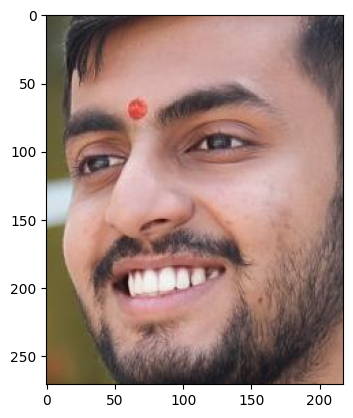

Predicted Age :  30-34 
Probabilities : ['20-24 years old: 0.1000', '25-29 years old: 0.3400', '30-34 years old: 0.4000', '35-39 years old: 0.1400', '40-44 years old: 0.0200', '45-49 years old: 0.0000', '50-54 years old: 0.0000', '55-59 years old: 0.0000', '60-65 years old: 0.0000']


In [20]:
import cv2
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from mtcnn import MTCNN

def load_and_preprocess_image(filepath):
    test_img = image.load_img(filepath, target_size=(198, 198))
    test_img = image.img_to_array(test_img)
    test_img = np.expand_dims(test_img, axis=0)
    test_img /= 255
    return test_img

def detect_and_crop_face(image_path):
    img = cv2.imread(image_path)
    detector = MTCNN()
    result = detector.detect_faces(img)
    
    if len(result) == 1:
        x, y, w, h = result[0]['box']
        cropped_img = img[y:y+h, x:x+w]
        return cropped_img
    else:
        return None



def predict_age_from_image(image_path, model):
    cropped_img = detect_and_crop_face(image_path)
    prb_age = []  # Initialize prb_age here
    if cropped_img is not None:
        age_pred = model.predict(load_and_preprocess_image(image_path))
        age_pred_rounded = [round(prob, 2) for prob in age_pred[0]]
        age_classes = ['20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-65']
        max_prob_index = np.argmax(age_pred[0])
        max_age_class = age_classes[max_prob_index]
        
        plt.imshow(cv2.cvtColor(cropped_img, cv2.COLOR_BGR2RGB))
        plt.show()
        
        # print("Probabilities :", age_classes)
        # print("Probabilities :", age_pred_rounded)
        # print(f'Most probable age group: {max_age_class}')
              
        # Print predicted age probabilities
        for i, prob in enumerate(age_pred_rounded):
            prb_age.append(f"{age_classes[i]} years old: {prob:.4f}")



        # Get the index of the maximum probability
        max_age_index = np.argmax(age_pred)

        # Print predicted age
        predicted_age = age_classes[max_age_index]

        #print('Predicted Age i: ', predicted_age ,'Probabilities i :',prb_age)
    else:
        predicted_age= ("No face detected or Multiple faces detected in the image, Please upload an image with one human face!")
        
    print('Predicted Age : ', predicted_age  ,'\nProbabilities :',prb_age)



# Example usage
picture = "/Users/rachana/Rachana_Python_VS/age_detection_version2/Images/MicrosoftTeams-image (12).png"
predict_age_from_image(picture,new_model)



1/1 [==============================] - 0s 16ms/step


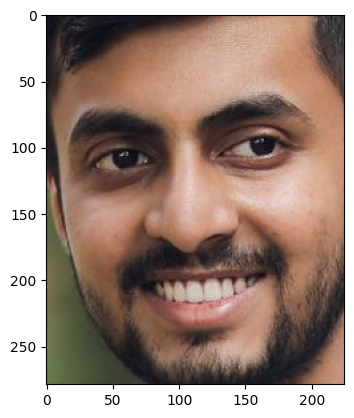

Predicted Age :  25-29 
Probabilities : ['20-24 years old: 0.2000', '25-29 years old: 0.3200', '30-34 years old: 0.2000', '35-39 years old: 0.1200', '40-44 years old: 0.0600', '45-49 years old: 0.0600', '50-54 years old: 0.0300', '55-59 years old: 0.0100', '60-65 years old: 0.0000']


In [21]:
import cv2
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from mtcnn import MTCNN

def load_and_preprocess_image(filepath):
    test_img = image.load_img(filepath, target_size=(198, 198))
    test_img = image.img_to_array(test_img)
    test_img = np.expand_dims(test_img, axis=0)
    test_img /= 255
    return test_img

def detect_and_crop_face(image_path):
    img = cv2.imread(image_path)
    detector = MTCNN()
    result = detector.detect_faces(img)
    
    if len(result) == 1:
        x, y, w, h = result[0]['box']
        cropped_img = img[y:y+h, x:x+w]
        return cropped_img
    else:
        return None



def predict_age_from_image(image_path, model):
    cropped_img = detect_and_crop_face(image_path)
    prb_age = []  # Initialize prb_age here
    if cropped_img is not None:
        age_pred = model.predict(load_and_preprocess_image(image_path))
        age_pred_rounded = [round(prob, 2) for prob in age_pred[0]]
        age_classes = ['20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-65']
        max_prob_index = np.argmax(age_pred[0])
        max_age_class = age_classes[max_prob_index]
        
        plt.imshow(cv2.cvtColor(cropped_img, cv2.COLOR_BGR2RGB))
        plt.show()
        
        # print("Probabilities :", age_classes)
        # print("Probabilities :", age_pred_rounded)
        # print(f'Most probable age group: {max_age_class}')
              
        # Print predicted age probabilities
        for i, prob in enumerate(age_pred_rounded):
            prb_age.append(f"{age_classes[i]} years old: {prob:.4f}")



        # Get the index of the maximum probability
        max_age_index = np.argmax(age_pred)

        # Print predicted age
        predicted_age = age_classes[max_age_index]

        #print('Predicted Age i: ', predicted_age ,'Probabilities i :',prb_age)
    else:
        predicted_age= ("No face detected or Multiple faces detected in the image, Please upload an image with one human face!")
        
    print('Predicted Age : ', predicted_age  ,'\nProbabilities :',prb_age)



# Example usage
picture = "/Users/rachana/Rachana_Python_VS/age_detection_version2/Images/MicrosoftTeams-image (13).png"
predict_age_from_image(picture,new_model)


1/1 [==============================] - 0s 16ms/step


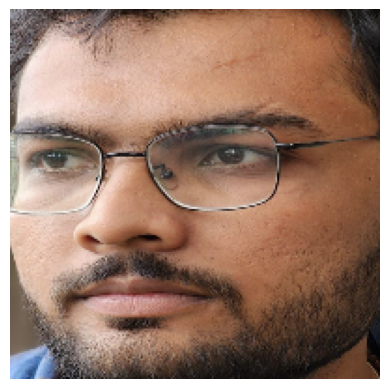

20-24 years old: 0.0000
25-29 years old: 1.0000
30-34 years old: 0.0000
35-39 years old: 0.0000
40-44 years old: 0.0000
45-49 years old: 0.0000
50-54 years old: 0.0000
55-59 years old: 0.0000
60-65 years old: 0.0000

Predicted Age: 25-29


In [59]:
import cv2
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from mtcnn import MTCNN

def load_and_preprocess_image(filepath):
    test_img = image.load_img(filepath, target_size=(198, 198))
    test_img = image.img_to_array(test_img)
    test_img = np.expand_dims(test_img, axis=0)
    test_img /= 255
    return test_img

def detect_and_crop_face(image_path):
    img = cv2.imread(image_path)
    detector = MTCNN()
    result = detector.detect_faces(img)
    
    if len(result) == 1:
        x, y, w, h = result[0]['box']
        cropped_img = img[y:y+h, x:x+w]
        return cropped_img
    else:
        return None



def predict_age_from_image(image_path, model):
    cropped_img = detect_and_crop_face(image_path)
    prb_age = []  # Initialize prb_age here
    if cropped_img is not None:
        age_pred = model.predict(load_and_preprocess_image(image_path))
        age_pred_rounded = [round(prob, 2) for prob in age_pred[0]]
        age_classes = ['20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-65']
        max_prob_index = np.argmax(age_pred[0])
        max_age_class = age_classes[max_prob_index]
        
        plt.imshow(cv2.cvtColor(cropped_img, cv2.COLOR_BGR2RGB))
        plt.show()
        
        # print("Probabilities :", age_classes)
        # print("Probabilities :", age_pred_rounded)
        # print(f'Most probable age group: {max_age_class}')
              
        # Print predicted age probabilities
        for i, prob in enumerate(age_pred_rounded):
            prb_age.append(f"{age_classes[i]} years old: {prob:.4f}")



        # Get the index of the maximum probability
        max_age_index = np.argmax(age_pred)

        # Print predicted age
        predicted_age = age_classes[max_age_index]

        #print('Predicted Age i: ', predicted_age ,'Probabilities i :',prb_age)
    else:
        predicted_age= ("No face detected or Multiple faces detected in the image, Please upload an image with one human face!")
        
    print('Predicted Age : ', predicted_age  ,'\nProbabilities :',prb_age)

# Example usage
picture = "/Users/rachana/Rachana_Python_VS/age_detection_version2/Images/MicrosoftTeams-image (14).png"
predict_age_from_image(picture,new_model)


1/1 [==============================] - 0s 17ms/step


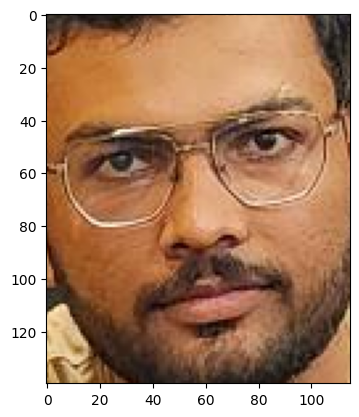

Predicted Age :  35-39 
Probabilities : ['20-24 years old: 0.0100', '25-29 years old: 0.1000', '30-34 years old: 0.2100', '35-39 years old: 0.2500', '40-44 years old: 0.1800', '45-49 years old: 0.1300', '50-54 years old: 0.0700', '55-59 years old: 0.0300', '60-65 years old: 0.0100']


In [22]:
import cv2
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from mtcnn import MTCNN

def load_and_preprocess_image(filepath):
    test_img = image.load_img(filepath, target_size=(198, 198))
    test_img = image.img_to_array(test_img)
    test_img = np.expand_dims(test_img, axis=0)
    test_img /= 255
    return test_img

def detect_and_crop_face(image_path):
    img = cv2.imread(image_path)
    detector = MTCNN()
    result = detector.detect_faces(img)
    
    if len(result) == 1:
        x, y, w, h = result[0]['box']
        cropped_img = img[y:y+h, x:x+w]
        return cropped_img
    else:
        return None



def predict_age_from_image(image_path, model):
    cropped_img = detect_and_crop_face(image_path)
    prb_age = []  # Initialize prb_age here
    if cropped_img is not None:
        age_pred = model.predict(load_and_preprocess_image(image_path))
        age_pred_rounded = [round(prob, 2) for prob in age_pred[0]]
        age_classes = ['20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-65']
        max_prob_index = np.argmax(age_pred[0])
        max_age_class = age_classes[max_prob_index]
        
        plt.imshow(cv2.cvtColor(cropped_img, cv2.COLOR_BGR2RGB))
        plt.show()
        
        # print("Probabilities :", age_classes)
        # print("Probabilities :", age_pred_rounded)
        # print(f'Most probable age group: {max_age_class}')
              
        # Print predicted age probabilities
        for i, prob in enumerate(age_pred_rounded):
            prb_age.append(f"{age_classes[i]} years old: {prob:.4f}")



        # Get the index of the maximum probability
        max_age_index = np.argmax(age_pred)

        # Print predicted age
        predicted_age = age_classes[max_age_index]

        #print('Predicted Age i: ', predicted_age ,'Probabilities i :',prb_age)
    else:
        predicted_age= ("No face detected or Multiple faces detected in the image, Please upload an image with one human face!")
        
    print('Predicted Age : ', predicted_age  ,'\nProbabilities :',prb_age)

# Example usage
picture = "/Users/rachana/Rachana_Python_VS/age_detection_version2/Images/MicrosoftTeams-image (17).png"
predict_age_from_image(picture,new_model)


1/1 [==============================] - 0s 14ms/step


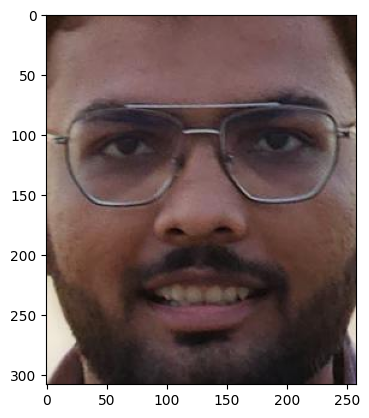

Predicted Age :  25-29 
Probabilities : ['20-24 years old: 0.1400', '25-29 years old: 0.3100', '30-34 years old: 0.2500', '35-39 years old: 0.1400', '40-44 years old: 0.0600', '45-49 years old: 0.0400', '50-54 years old: 0.0300', '55-59 years old: 0.0200', '60-65 years old: 0.0100']


In [23]:
import cv2
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from mtcnn import MTCNN

def load_and_preprocess_image(filepath):
    test_img = image.load_img(filepath, target_size=(198, 198))
    test_img = image.img_to_array(test_img)
    test_img = np.expand_dims(test_img, axis=0)
    test_img /= 255
    return test_img

def detect_and_crop_face(image_path):
    img = cv2.imread(image_path)
    detector = MTCNN()
    result = detector.detect_faces(img)
    
    if len(result) == 1:
        x, y, w, h = result[0]['box']
        cropped_img = img[y:y+h, x:x+w]
        return cropped_img
    else:
        return None



def predict_age_from_image(image_path, model):
    cropped_img = detect_and_crop_face(image_path)
    prb_age = []  # Initialize prb_age here
    if cropped_img is not None:
        age_pred = model.predict(load_and_preprocess_image(image_path))
        age_pred_rounded = [round(prob, 2) for prob in age_pred[0]]
        age_classes = ['20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-65']
        max_prob_index = np.argmax(age_pred[0])
        max_age_class = age_classes[max_prob_index]
        
        plt.imshow(cv2.cvtColor(cropped_img, cv2.COLOR_BGR2RGB))
        plt.show()
        
        # print("Probabilities :", age_classes)
        # print("Probabilities :", age_pred_rounded)
        # print(f'Most probable age group: {max_age_class}')
              
        # Print predicted age probabilities
        for i, prob in enumerate(age_pred_rounded):
            prb_age.append(f"{age_classes[i]} years old: {prob:.4f}")



        # Get the index of the maximum probability
        max_age_index = np.argmax(age_pred)

        # Print predicted age
        predicted_age = age_classes[max_age_index]

        #print('Predicted Age i: ', predicted_age ,'Probabilities i :',prb_age)
    else:
        predicted_age= ("No face detected or Multiple faces detected in the image, Please upload an image with one human face!")
        
    print('Predicted Age : ', predicted_age  ,'\nProbabilities :',prb_age)

# Example usage
picture = "/Users/rachana/Rachana_Python_VS/age_detection_version2/Images/MicrosoftTeams-image (18).png"
predict_age_from_image(picture,new_model)



1/1 [==============================] - 0s 15ms/step


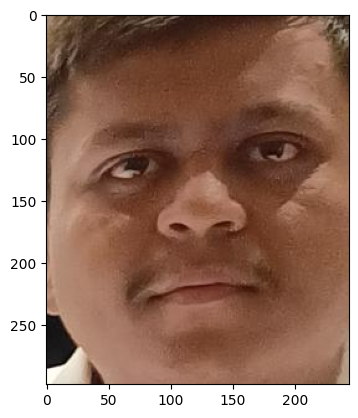

Predicted Age :  20-24 
Probabilities : ['20-24 years old: 0.2500', '25-29 years old: 0.0900', '30-34 years old: 0.0200', '35-39 years old: 0.0100', '40-44 years old: 0.0200', '45-49 years old: 0.0700', '50-54 years old: 0.1200', '55-59 years old: 0.2000', '60-65 years old: 0.2200']


In [24]:
import cv2
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from mtcnn import MTCNN

def load_and_preprocess_image(filepath):
    test_img = image.load_img(filepath, target_size=(198, 198))
    test_img = image.img_to_array(test_img)
    test_img = np.expand_dims(test_img, axis=0)
    test_img /= 255
    return test_img

def detect_and_crop_face(image_path):
    img = cv2.imread(image_path)
    detector = MTCNN()
    result = detector.detect_faces(img)
    
    if len(result) == 1:
        x, y, w, h = result[0]['box']
        cropped_img = img[y:y+h, x:x+w]
        return cropped_img
    else:
        return None



def predict_age_from_image(image_path, model):
    cropped_img = detect_and_crop_face(image_path)
    prb_age = []  # Initialize prb_age here
    if cropped_img is not None:
        age_pred = model.predict(load_and_preprocess_image(image_path))
        age_pred_rounded = [round(prob, 2) for prob in age_pred[0]]
        age_classes = ['20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-65']
        max_prob_index = np.argmax(age_pred[0])
        max_age_class = age_classes[max_prob_index]
        
        plt.imshow(cv2.cvtColor(cropped_img, cv2.COLOR_BGR2RGB))
        plt.show()
        
        # print("Probabilities :", age_classes)
        # print("Probabilities :", age_pred_rounded)
        # print(f'Most probable age group: {max_age_class}')
              
        # Print predicted age probabilities
        for i, prob in enumerate(age_pred_rounded):
            prb_age.append(f"{age_classes[i]} years old: {prob:.4f}")



        # Get the index of the maximum probability
        max_age_index = np.argmax(age_pred)

        # Print predicted age
        predicted_age = age_classes[max_age_index]

        #print('Predicted Age i: ', predicted_age ,'Probabilities i :',prb_age)
    else:
        predicted_age= ("No face detected or Multiple faces detected in the image, Please upload an image with one human face!")
        
    print('Predicted Age : ', predicted_age  ,'\nProbabilities :',prb_age)

# Example usage
picture = "/Users/rachana/Rachana_Python_VS/age_detection_version2/Images/MicrosoftTeams-image (19).png"
predict_age_from_image(picture,new_model)


1/1 [==============================] - 0s 15ms/step


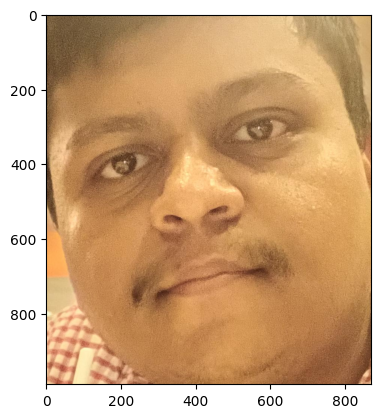

Predicted Age :  45-49 
Probabilities : ['20-24 years old: 0.0200', '25-29 years old: 0.0500', '30-34 years old: 0.0700', '35-39 years old: 0.1200', '40-44 years old: 0.1700', '45-49 years old: 0.2400', '50-54 years old: 0.1900', '55-59 years old: 0.1000', '60-65 years old: 0.0500']


In [25]:
import cv2
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from mtcnn import MTCNN

def load_and_preprocess_image(filepath):
    test_img = image.load_img(filepath, target_size=(198, 198))
    test_img = image.img_to_array(test_img)
    test_img = np.expand_dims(test_img, axis=0)
    test_img /= 255
    return test_img

def detect_and_crop_face(image_path):
    img = cv2.imread(image_path)
    detector = MTCNN()
    result = detector.detect_faces(img)
    
    if len(result) == 1:
        x, y, w, h = result[0]['box']
        cropped_img = img[y:y+h, x:x+w]
        return cropped_img
    else:
        return None



def predict_age_from_image(image_path, model):
    cropped_img = detect_and_crop_face(image_path)
    prb_age = []  # Initialize prb_age here
    if cropped_img is not None:
        age_pred = model.predict(load_and_preprocess_image(image_path))
        age_pred_rounded = [round(prob, 2) for prob in age_pred[0]]
        age_classes = ['20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-65']
        max_prob_index = np.argmax(age_pred[0])
        max_age_class = age_classes[max_prob_index]
        
        plt.imshow(cv2.cvtColor(cropped_img, cv2.COLOR_BGR2RGB))
        plt.show()
        
        # print("Probabilities :", age_classes)
        # print("Probabilities :", age_pred_rounded)
        # print(f'Most probable age group: {max_age_class}')
              
        # Print predicted age probabilities
        for i, prob in enumerate(age_pred_rounded):
            prb_age.append(f"{age_classes[i]} years old: {prob:.4f}")



        # Get the index of the maximum probability
        max_age_index = np.argmax(age_pred)

        # Print predicted age
        predicted_age = age_classes[max_age_index]

        #print('Predicted Age i: ', predicted_age ,'Probabilities i :',prb_age)
    else:
        predicted_age= ("No face detected or Multiple faces detected in the image, Please upload an image with one human face!")
        
    print('Predicted Age : ', predicted_age  ,'\nProbabilities :',prb_age)


# Example usage
picture = "/Users/rachana/Rachana_Python_VS/age_detection_version2/Images/MicrosoftTeams-image (20).png"
predict_age_from_image(picture,new_model)


1/1 [==============================] - 0s 15ms/step


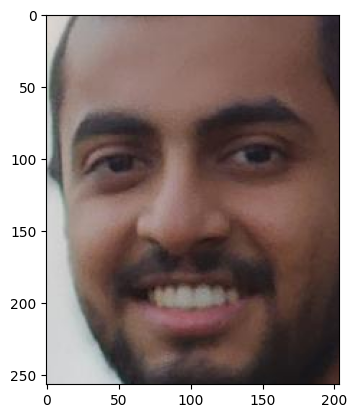

Predicted Age :  35-39 
Probabilities : ['20-24 years old: 0.0600', '25-29 years old: 0.1000', '30-34 years old: 0.1300', '35-39 years old: 0.1700', '40-44 years old: 0.1600', '45-49 years old: 0.1600', '50-54 years old: 0.1200', '55-59 years old: 0.0600', '60-65 years old: 0.0300']


In [26]:
import cv2
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from mtcnn import MTCNN

def load_and_preprocess_image(filepath):
    test_img = image.load_img(filepath, target_size=(198, 198))
    test_img = image.img_to_array(test_img)
    test_img = np.expand_dims(test_img, axis=0)
    test_img /= 255
    return test_img

def detect_and_crop_face(image_path):
    img = cv2.imread(image_path)
    detector = MTCNN()
    result = detector.detect_faces(img)
    
    if len(result) == 1:
        x, y, w, h = result[0]['box']
        cropped_img = img[y:y+h, x:x+w]
        return cropped_img
    else:
        return None



def predict_age_from_image(image_path, model):
    cropped_img = detect_and_crop_face(image_path)
    prb_age = []  # Initialize prb_age here
    if cropped_img is not None:
        age_pred = model.predict(load_and_preprocess_image(image_path))
        age_pred_rounded = [round(prob, 2) for prob in age_pred[0]]
        age_classes = ['20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-65']
        max_prob_index = np.argmax(age_pred[0])
        max_age_class = age_classes[max_prob_index]
        
        plt.imshow(cv2.cvtColor(cropped_img, cv2.COLOR_BGR2RGB))
        plt.show()
        
        # print("Probabilities :", age_classes)
        # print("Probabilities :", age_pred_rounded)
        # print(f'Most probable age group: {max_age_class}')
              
        # Print predicted age probabilities
        for i, prob in enumerate(age_pred_rounded):
            prb_age.append(f"{age_classes[i]} years old: {prob:.4f}")



        # Get the index of the maximum probability
        max_age_index = np.argmax(age_pred)

        # Print predicted age
        predicted_age = age_classes[max_age_index]

        #print('Predicted Age i: ', predicted_age ,'Probabilities i :',prb_age)
    else:
        predicted_age= ("No face detected or Multiple faces detected in the image, Please upload an image with one human face!")
        
    print('Predicted Age : ', predicted_age  ,'\nProbabilities :',prb_age)

# Example usage
picture = "/Users/rachana/Rachana_Python_VS/age_detection_version2/Images/MicrosoftTeams-image (21).png"
predict_age_from_image(picture,new_model)


In [27]:
import cv2
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from mtcnn import MTCNN

def load_and_preprocess_image(filepath):
    test_img = image.load_img(filepath, target_size=(198, 198))
    test_img = image.img_to_array(test_img)
    test_img = np.expand_dims(test_img, axis=0)
    test_img /= 255
    return test_img

def detect_and_crop_face(image_path):
    img = cv2.imread(image_path)
    detector = MTCNN()
    result = detector.detect_faces(img)
    
    if len(result) == 1:
        x, y, w, h = result[0]['box']
        cropped_img = img[y:y+h, x:x+w]
        return cropped_img
    else:
        return None



def predict_age_from_image(image_path, model):
    cropped_img = detect_and_crop_face(image_path)
    prb_age = []  # Initialize prb_age here
    if cropped_img is not None:
        age_pred = model.predict(load_and_preprocess_image(image_path))
        age_pred_rounded = [round(prob, 2) for prob in age_pred[0]]
        age_classes = ['20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-65']
        max_prob_index = np.argmax(age_pred[0])
        max_age_class = age_classes[max_prob_index]
        
        plt.imshow(cv2.cvtColor(cropped_img, cv2.COLOR_BGR2RGB))
        plt.show()
        
        # print("Probabilities :", age_classes)
        # print("Probabilities :", age_pred_rounded)
        # print(f'Most probable age group: {max_age_class}')
              
        # Print predicted age probabilities
        for i, prob in enumerate(age_pred_rounded):
            prb_age.append(f"{age_classes[i]} years old: {prob:.4f}")



        # Get the index of the maximum probability
        max_age_index = np.argmax(age_pred)

        # Print predicted age
        predicted_age = age_classes[max_age_index]

        #print('Predicted Age i: ', predicted_age ,'Probabilities i :',prb_age)
    else:
        predicted_age= ("No face detected or Multiple faces detected in the image, Please upload an image with one human face!")
        
    print('Predicted Age : ', predicted_age  ,'\nProbabilities :',prb_age)

# Example usage
picture = "/Users/rachana/Rachana_Python_VS/age_detection_version2/Images/pexels-pixabay-60597.jpg"
predict_age_from_image(picture,new_model)


1/1 [==============================] - 0s 290ms/step
Predicted Age :  No face detected or Multiple faces detected in the image, Please upload an image with one human face! 
Probabilities : []


In [28]:
import cv2
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from mtcnn import MTCNN

def load_and_preprocess_image(filepath):
    test_img = image.load_img(filepath, target_size=(198, 198))
    test_img = image.img_to_array(test_img)
    test_img = np.expand_dims(test_img, axis=0)
    test_img /= 255
    return test_img

def detect_and_crop_face(image_path):
    img = cv2.imread(image_path)
    detector = MTCNN()
    result = detector.detect_faces(img)
    
    if len(result) == 1:
        x, y, w, h = result[0]['box']
        cropped_img = img[y:y+h, x:x+w]
        return cropped_img
    else:
        return None



def predict_age_from_image(image_path, model):
    cropped_img = detect_and_crop_face(image_path)
    prb_age = []  # Initialize prb_age here
    if cropped_img is not None:
        age_pred = model.predict(load_and_preprocess_image(image_path))
        age_pred_rounded = [round(prob, 2) for prob in age_pred[0]]
        age_classes = ['20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-65']
        max_prob_index = np.argmax(age_pred[0])
        max_age_class = age_classes[max_prob_index]
        
        plt.imshow(cv2.cvtColor(cropped_img, cv2.COLOR_BGR2RGB))
        plt.show()
        
        # print("Probabilities :", age_classes)
        # print("Probabilities :", age_pred_rounded)
        # print(f'Most probable age group: {max_age_class}')
              
        # Print predicted age probabilities
        for i, prob in enumerate(age_pred_rounded):
            prb_age.append(f"{age_classes[i]} years old: {prob:.4f}")



        # Get the index of the maximum probability
        max_age_index = np.argmax(age_pred)

        # Print predicted age
        predicted_age = age_classes[max_age_index]

        #print('Predicted Age i: ', predicted_age ,'Probabilities i :',prb_age)
    else:
        predicted_age= ("No face detected or Multiple faces detected in the image, Please upload an image with one human face!")
        
    print('Predicted Age : ', predicted_age  ,'\nProbabilities :',prb_age)

# Example usage
picture = "/Users/rachana/Rachana_Python_VS/age_detection_version2/Images/images.jpeg"
predict_age_from_image(picture,new_model)


1/1 [==============================] - 0s 265ms/step
Predicted Age :  No face detected or Multiple faces detected in the image, Please upload an image with one human face! 
Probabilities : []


In [29]:
import cv2
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from mtcnn import MTCNN

def load_and_preprocess_image(filepath):
    test_img = image.load_img(filepath, target_size=(198, 198))
    test_img = image.img_to_array(test_img)
    test_img = np.expand_dims(test_img, axis=0)
    test_img /= 255
    return test_img

def detect_and_crop_face(image_path):
    img = cv2.imread(image_path)
    detector = MTCNN()
    result = detector.detect_faces(img)
    
    if len(result) == 1:
        x, y, w, h = result[0]['box']
        cropped_img = img[y:y+h, x:x+w]
        return cropped_img
    else:
        return None



def predict_age_from_image(image_path, model):
    cropped_img = detect_and_crop_face(image_path)
    prb_age = []  # Initialize prb_age here
    if cropped_img is not None:
        age_pred = model.predict(load_and_preprocess_image(image_path))
        age_pred_rounded = [round(prob, 2) for prob in age_pred[0]]
        age_classes = ['20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-65']
        max_prob_index = np.argmax(age_pred[0])
        max_age_class = age_classes[max_prob_index]
        
        plt.imshow(cv2.cvtColor(cropped_img, cv2.COLOR_BGR2RGB))
        plt.show()
        
        # print("Probabilities :", age_classes)
        # print("Probabilities :", age_pred_rounded)
        # print(f'Most probable age group: {max_age_class}')
              
        # Print predicted age probabilities
        for i, prob in enumerate(age_pred_rounded):
            prb_age.append(f"{age_classes[i]} years old: {prob:.4f}")



        # Get the index of the maximum probability
        max_age_index = np.argmax(age_pred)

        # Print predicted age
        predicted_age = age_classes[max_age_index]

        #print('Predicted Age i: ', predicted_age ,'Probabilities i :',prb_age)
    else:
        predicted_age= ("No face detected or Multiple faces detected in the image, Please upload an image with one human face!")
        
    print('Predicted Age : ', predicted_age  ,'\nProbabilities :',prb_age)

# Example usage
picture = "/Users/rachana/Rachana_Python_VS/age_detection_version2/Images/images (2).jpeg"
predict_age_from_image(picture,new_model)


1/1 [==============================] - 0s 98ms/step
Predicted Age :  No face detected or Multiple faces detected in the image, Please upload an image with one human face! 
Probabilities : []


In [30]:
import cv2
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from mtcnn import MTCNN

def load_and_preprocess_image(filepath):
    test_img = image.load_img(filepath, target_size=(198, 198))
    test_img = image.img_to_array(test_img)
    test_img = np.expand_dims(test_img, axis=0)
    test_img /= 255
    return test_img

def detect_and_crop_face(image_path):
    img = cv2.imread(image_path)
    detector = MTCNN()
    result = detector.detect_faces(img)
    
    if len(result) == 1:
        x, y, w, h = result[0]['box']
        cropped_img = img[y:y+h, x:x+w]
        return cropped_img
    else:
        return None



def predict_age_from_image(image_path, model):
    cropped_img = detect_and_crop_face(image_path)
    prb_age = []  # Initialize prb_age here
    if cropped_img is not None:
        age_pred = model.predict(load_and_preprocess_image(image_path))
        age_pred_rounded = [round(prob, 2) for prob in age_pred[0]]
        age_classes = ['20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-65']
        max_prob_index = np.argmax(age_pred[0])
        max_age_class = age_classes[max_prob_index]
        
        plt.imshow(cv2.cvtColor(cropped_img, cv2.COLOR_BGR2RGB))
        plt.show()
        
        # print("Probabilities :", age_classes)
        # print("Probabilities :", age_pred_rounded)
        # print(f'Most probable age group: {max_age_class}')
              
        # Print predicted age probabilities
        for i, prob in enumerate(age_pred_rounded):
            prb_age.append(f"{age_classes[i]} years old: {prob:.4f}")



        # Get the index of the maximum probability
        max_age_index = np.argmax(age_pred)

        # Print predicted age
        predicted_age = age_classes[max_age_index]

        #print('Predicted Age i: ', predicted_age ,'Probabilities i :',prb_age)
    else:
        predicted_age= ("No face detected or Multiple faces detected in the image, Please upload an image with one human face!")
        
    print('Predicted Age : ', predicted_age  ,'\nProbabilities :',prb_age)


# Example usage
picture = "/Users/rachana/Rachana_Python_VS/age_detection_version2/Images/images (1).jpeg"
predict_age_from_image(picture,new_model)


1/1 [==============================] - 0s 215ms/step
Predicted Age :  No face detected or Multiple faces detected in the image, Please upload an image with one human face! 
Probabilities : []


In [31]:
import cv2
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from mtcnn import MTCNN

def load_and_preprocess_image(filepath):
    test_img = image.load_img(filepath, target_size=(198, 198))
    test_img = image.img_to_array(test_img)
    test_img = np.expand_dims(test_img, axis=0)
    test_img /= 255
    return test_img

def detect_and_crop_face(image_path):
    img = cv2.imread(image_path)
    detector = MTCNN()
    result = detector.detect_faces(img)
    
    if len(result) == 1:
        x, y, w, h = result[0]['box']
        cropped_img = img[y:y+h, x:x+w]
        return cropped_img
    else:
        return None



def predict_age_from_image(image_path, model):
    cropped_img = detect_and_crop_face(image_path)
    prb_age = []  # Initialize prb_age here
    if cropped_img is not None:
        age_pred = model.predict(load_and_preprocess_image(image_path))
        age_pred_rounded = [round(prob, 2) for prob in age_pred[0]]
        age_classes = ['20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-65']
        max_prob_index = np.argmax(age_pred[0])
        max_age_class = age_classes[max_prob_index]
        
        plt.imshow(cv2.cvtColor(cropped_img, cv2.COLOR_BGR2RGB))
        plt.show()
        
        # print("Probabilities :", age_classes)
        # print("Probabilities :", age_pred_rounded)
        # print(f'Most probable age group: {max_age_class}')
              
        # Print predicted age probabilities
        for i, prob in enumerate(age_pred_rounded):
            prb_age.append(f"{age_classes[i]} years old: {prob:.4f}")



        # Get the index of the maximum probability
        max_age_index = np.argmax(age_pred)

        # Print predicted age
        predicted_age = age_classes[max_age_index]

        #print('Predicted Age i: ', predicted_age ,'Probabilities i :',prb_age)
    else:
        predicted_age= ("No face detected or Multiple faces detected in the image, Please upload an image with one human face!")
        
    print('Predicted Age : ', predicted_age  ,'\nProbabilities :',prb_age)


# Example usage
picture = "/Users/rachana/Rachana_Python_VS/age_detection_version2/Images/download (1).jpeg"
predict_age_from_image(picture,new_model)


1/1 [==============================] - 0s 401ms/step
Predicted Age :  No face detected or Multiple faces detected in the image, Please upload an image with one human face! 
Probabilities : []


In [32]:
import cv2
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from mtcnn import MTCNN

def load_and_preprocess_image(filepath):
    test_img = image.load_img(filepath, target_size=(198, 198))
    test_img = image.img_to_array(test_img)
    test_img = np.expand_dims(test_img, axis=0)
    test_img /= 255
    return test_img

def detect_and_crop_face(image_path):
    img = cv2.imread(image_path)
    detector = MTCNN()
    result = detector.detect_faces(img)
    
    if len(result) == 1:
        x, y, w, h = result[0]['box']
        cropped_img = img[y:y+h, x:x+w]
        return cropped_img
    else:
        return None



def predict_age_from_image(image_path, model):
    cropped_img = detect_and_crop_face(image_path)
    prb_age = []  # Initialize prb_age here
    if cropped_img is not None:
        age_pred = model.predict(load_and_preprocess_image(image_path))
        age_pred_rounded = [round(prob, 2) for prob in age_pred[0]]
        age_classes = ['20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-65']
        max_prob_index = np.argmax(age_pred[0])
        max_age_class = age_classes[max_prob_index]
        
        plt.imshow(cv2.cvtColor(cropped_img, cv2.COLOR_BGR2RGB))
        plt.show()
        
        # print("Probabilities :", age_classes)
        # print("Probabilities :", age_pred_rounded)
        # print(f'Most probable age group: {max_age_class}')
              
        # Print predicted age probabilities
        for i, prob in enumerate(age_pred_rounded):
            prb_age.append(f"{age_classes[i]} years old: {prob:.4f}")



        # Get the index of the maximum probability
        max_age_index = np.argmax(age_pred)

        # Print predicted age
        predicted_age = age_classes[max_age_index]

        #print('Predicted Age i: ', predicted_age ,'Probabilities i :',prb_age)
    else:
        predicted_age= ("No face detected or Multiple faces detected in the image, Please upload an image with one human face!")
        
    print('Predicted Age : ', predicted_age  ,'\nProbabilities :',prb_age)

# Example usage
picture = "/Users/rachana/Rachana_Python_VS/age_detection_version2/Images/download (2).jpeg"
predict_age_from_image(picture,new_model)


2/2 [==============================] - 0s 140ms/step
Predicted Age :  No face detected or Multiple faces detected in the image, Please upload an image with one human face! 
Probabilities : []


In [33]:
import cv2
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from mtcnn import MTCNN

def load_and_preprocess_image(filepath):
    test_img = image.load_img(filepath, target_size=(198, 198))
    test_img = image.img_to_array(test_img)
    test_img = np.expand_dims(test_img, axis=0)
    test_img /= 255
    return test_img

def detect_and_crop_face(image_path):
    img = cv2.imread(image_path)
    detector = MTCNN()
    result = detector.detect_faces(img)
    
    if len(result) == 1:
        x, y, w, h = result[0]['box']
        cropped_img = img[y:y+h, x:x+w]
        return cropped_img
    else:
        return None



def predict_age_from_image(image_path, model):
    cropped_img = detect_and_crop_face(image_path)
    prb_age = []  # Initialize prb_age here
    if cropped_img is not None:
        age_pred = model.predict(load_and_preprocess_image(image_path))
        age_pred_rounded = [round(prob, 2) for prob in age_pred[0]]
        age_classes = ['20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-65']
        max_prob_index = np.argmax(age_pred[0])
        max_age_class = age_classes[max_prob_index]
        
        plt.imshow(cv2.cvtColor(cropped_img, cv2.COLOR_BGR2RGB))
        plt.show()
        
        # print("Probabilities :", age_classes)
        # print("Probabilities :", age_pred_rounded)
        # print(f'Most probable age group: {max_age_class}')
              
        # Print predicted age probabilities
        for i, prob in enumerate(age_pred_rounded):
            prb_age.append(f"{age_classes[i]} years old: {prob:.4f}")



        # Get the index of the maximum probability
        max_age_index = np.argmax(age_pred)

        # Print predicted age
        predicted_age = age_classes[max_age_index]

        #print('Predicted Age i: ', predicted_age ,'Probabilities i :',prb_age)
    else:
        predicted_age= ("No face detected or Multiple faces detected in the image, Please upload an image with one human face!")
        
    print('Predicted Age : ', predicted_age  ,'\nProbabilities :',prb_age)

# Example usage
picture = "/Users/rachana/Rachana_Python_VS/age_detection_version2/Images/download (3).jpeg"
predict_age_from_image(picture,new_model)


1/1 [==============================] - 0s 292ms/step
Predicted Age :  No face detected or Multiple faces detected in the image, Please upload an image with one human face! 
Probabilities : []


In [34]:
import cv2
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from mtcnn import MTCNN

def load_and_preprocess_image(filepath):
    test_img = image.load_img(filepath, target_size=(198, 198))
    test_img = image.img_to_array(test_img)
    test_img = np.expand_dims(test_img, axis=0)
    test_img /= 255
    return test_img

def detect_and_crop_face(image_path):
    img = cv2.imread(image_path)
    detector = MTCNN()
    result = detector.detect_faces(img)
    
    if len(result) == 1:
        x, y, w, h = result[0]['box']
        cropped_img = img[y:y+h, x:x+w]
        return cropped_img
    else:
        return None



def predict_age_from_image(image_path, model):
    cropped_img = detect_and_crop_face(image_path)
    prb_age = []  # Initialize prb_age here
    if cropped_img is not None:
        age_pred = model.predict(load_and_preprocess_image(image_path))
        age_pred_rounded = [round(prob, 2) for prob in age_pred[0]]
        age_classes = ['20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-65']
        max_prob_index = np.argmax(age_pred[0])
        max_age_class = age_classes[max_prob_index]
        
        plt.imshow(cv2.cvtColor(cropped_img, cv2.COLOR_BGR2RGB))
        plt.show()
        
        # print("Probabilities :", age_classes)
        # print("Probabilities :", age_pred_rounded)
        # print(f'Most probable age group: {max_age_class}')
              
        # Print predicted age probabilities
        for i, prob in enumerate(age_pred_rounded):
            prb_age.append(f"{age_classes[i]} years old: {prob:.4f}")



        # Get the index of the maximum probability
        max_age_index = np.argmax(age_pred)

        # Print predicted age
        predicted_age = age_classes[max_age_index]

        #print('Predicted Age i: ', predicted_age ,'Probabilities i :',prb_age)
    else:
        predicted_age= ("No face detected or Multiple faces detected in the image, Please upload an image with one human face!")
        
    print('Predicted Age : ', predicted_age  ,'\nProbabilities :',prb_age)


# Example usage
picture = "/Users/rachana/Rachana_Python_VS/age_detection_version2/Images/download (4).jpeg"
predict_age_from_image(picture,new_model)


1/1 [==============================] - 0s 234ms/step
Predicted Age :  No face detected or Multiple faces detected in the image, Please upload an image with one human face! 
Probabilities : []


In [35]:
import cv2
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from mtcnn import MTCNN

def load_and_preprocess_image(filepath):
    test_img = image.load_img(filepath, target_size=(198, 198))
    test_img = image.img_to_array(test_img)
    test_img = np.expand_dims(test_img, axis=0)
    test_img /= 255
    return test_img

def detect_and_crop_face(image_path):
    img = cv2.imread(image_path)
    detector = MTCNN()
    result = detector.detect_faces(img)
    
    if len(result) == 1:
        x, y, w, h = result[0]['box']
        cropped_img = img[y:y+h, x:x+w]
        return cropped_img
    else:
        return None



def predict_age_from_image(image_path, model):
    cropped_img = detect_and_crop_face(image_path)
    prb_age = []  # Initialize prb_age here
    if cropped_img is not None:
        age_pred = model.predict(load_and_preprocess_image(image_path))
        age_pred_rounded = [round(prob, 2) for prob in age_pred[0]]
        age_classes = ['20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-65']
        max_prob_index = np.argmax(age_pred[0])
        max_age_class = age_classes[max_prob_index]
        
        plt.imshow(cv2.cvtColor(cropped_img, cv2.COLOR_BGR2RGB))
        plt.show()
        
        # print("Probabilities :", age_classes)
        # print("Probabilities :", age_pred_rounded)
        # print(f'Most probable age group: {max_age_class}')
              
        # Print predicted age probabilities
        for i, prob in enumerate(age_pred_rounded):
            prb_age.append(f"{age_classes[i]} years old: {prob:.4f}")



        # Get the index of the maximum probability
        max_age_index = np.argmax(age_pred)

        # Print predicted age
        predicted_age = age_classes[max_age_index]

        #print('Predicted Age i: ', predicted_age ,'Probabilities i :',prb_age)
    else:
        predicted_age= ("No face detected or Multiple faces detected in the image, Please upload an image with one human face!")
        
    print('Predicted Age : ', predicted_age  ,'\nProbabilities :',prb_age)

# Example usage
picture = "/Users/rachana/Rachana_Python_VS/age_detection_version2/Images/download (5).jpeg"
predict_age_from_image(picture,new_model)


1/1 [==============================] - 0s 282ms/step
Predicted Age :  No face detected or Multiple faces detected in the image, Please upload an image with one human face! 
Probabilities : []


In [36]:
import cv2
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from mtcnn import MTCNN

def load_and_preprocess_image(filepath):
    test_img = image.load_img(filepath, target_size=(198, 198))
    test_img = image.img_to_array(test_img)
    test_img = np.expand_dims(test_img, axis=0)
    test_img /= 255
    return test_img

def detect_and_crop_face(image_path):
    img = cv2.imread(image_path)
    detector = MTCNN()
    result = detector.detect_faces(img)
    
    if len(result) == 1:
        x, y, w, h = result[0]['box']
        cropped_img = img[y:y+h, x:x+w]
        return cropped_img
    else:
        return None



def predict_age_from_image(image_path, model):
    cropped_img = detect_and_crop_face(image_path)
    prb_age = []  # Initialize prb_age here
    if cropped_img is not None:
        age_pred = model.predict(load_and_preprocess_image(image_path))
        age_pred_rounded = [round(prob, 2) for prob in age_pred[0]]
        age_classes = ['20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-65']
        max_prob_index = np.argmax(age_pred[0])
        max_age_class = age_classes[max_prob_index]
        
        plt.imshow(cv2.cvtColor(cropped_img, cv2.COLOR_BGR2RGB))
        plt.show()
        
        # print("Probabilities :", age_classes)
        # print("Probabilities :", age_pred_rounded)
        # print(f'Most probable age group: {max_age_class}')
              
        # Print predicted age probabilities
        for i, prob in enumerate(age_pred_rounded):
            prb_age.append(f"{age_classes[i]} years old: {prob:.4f}")



        # Get the index of the maximum probability
        max_age_index = np.argmax(age_pred)

        # Print predicted age
        predicted_age = age_classes[max_age_index]

        #print('Predicted Age i: ', predicted_age ,'Probabilities i :',prb_age)
    else:
        predicted_age= ("No face detected or Multiple faces detected in the image, Please upload an image with one human face!")
        
    print('Predicted Age : ', predicted_age  ,'\nProbabilities :',prb_age)

# Example usage
picture = "/Users/rachana/Rachana_Python_VS/age_detection_version2/Images/download (6).jpeg"
predict_age_from_image(picture,new_model)


1/1 [==============================] - 0s 256ms/step
Predicted Age :  No face detected or Multiple faces detected in the image, Please upload an image with one human face! 
Probabilities : []
